# **1. Introduction**

=================================================

    Objective : Proyek ini bertujuan untuk menganalisis data penggunaan kartu kredit di Bank ABC dan melakukan segmentasi pelanggan menggunakan algoritma K-Means Clustering. Melalui langkah-langkah seperti analisis data, cleaning data, dan feature engineering, hasil proyek ini diharapkan dapat membantu Bank ABC merancang strategi pemasaran dan pengembangan produk yang lebih efektif dan efisien untuk customer kartu kredit bank ABC

=================================================

# **2. Query SQL**



## **2.1. Authtentification With Collab**

```python
# Import Library
from google.colab import auth
from google.cloud import bigquery

# Jika ingin mengambil dari collab
auth.authenticate_user()
print('Authenticated')

project_id_akun = "ftds-hacktiv8-project-443814"
client = bigquery.Client(project=project_id_akun)

# Load Data
data = client.query("""
SELECT *
  FROM `ftds-hacktiv8-project.phase1_ftds_024_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0
""").to_dataframe()

## **2.2. SQL in BigQuery**

```python
SELECT *
  FROM `ftds-hacktiv8-project.phase1_ftds_024_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0

# **3. Import Libraries**

In [222]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


# Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modeling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples


# Model Saving
import pickle
import json

# Warnings 
import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**



## **3.1. Dataset Description**

Dataset Name : `credit-card-information`


| Kolom                           | Deskripsi                                                                 |
| ---                              | ---                                                                       |
| `CUST_ID`                        | Identifikasi pemegang kartu kredit.                                        |
| `BALANCE`                        | Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian.        |
| `BALANCE_FREQUENCY`              | Seberapa sering saldo diperbarui, dengan skor antara 0 dan 1 (1 = sering diperbarui, 0 = jarang diperbarui). |
| `PURCHASES`                      | Jumlah pembelian yang dilakukan dari akun.                                 |
| `ONEOFF_PURCHASES`               | Jumlah pembelian maksimum yang dilakukan dalam satu transaksi.            |
| `INSTALLMENTS_PURCHASES`         | Jumlah pembelian yang dilakukan dengan cicilan.                            |
| `CASH_ADVANCE`                   | Uang muka yang diberikan kepada pengguna.                                  |
| `PURCHASES_FREQUENCY`           | Seberapa sering pembelian dilakukan, dengan skor antara 0 dan 1 (1 = sering, 0 = jarang). |
| `ONEOFF_PURCHASES_FREQUENCY`    | Seberapa sering pembelian satu kali dilakukan, dengan skor antara 0 dan 1 (1 = sering, 0 = jarang). |
| `PURCHASES_INSTALLMENTS_FREQUENCY`| Seberapa sering pembelian secara cicilan dilakukan, dengan skor antara 0 dan 1 (1 = sering, 0 = jarang). |
| `CASH_ADVANCE_FREQUENCY`        | Seberapa sering uang muka dibayar, dengan skor antara 0 dan 1 (1 = sering, 0 = jarang). |
| `CASH_ADVANCE_TRX`              | Jumlah transaksi yang dilakukan dengan "uang muka".                        |
| `PURCHASES_TRX`                 | Jumlah transaksi pembelian yang dilakukan.                                |
| `CREDIT_LIMIT`                  | Batas kredit untuk pengguna kartu.                                        |
| `PAYMENTS`                      | Jumlah pembayaran yang dilakukan oleh pengguna.                            |
| `MINIMUM_PAYMENTS`              | Jumlah minimum pembayaran yang dilakukan oleh pengguna.                    |
| `PRC_FULL_PAYMENT`              | Persentase pembayaran penuh yang dilakukan oleh pengguna.                  |
| `TENURE`                        | Masa layanan kartu kredit untuk pengguna.                                 |





In [ ]:
# Membaca file CSV hasil SQL kemudian menampungnya ke dalam variabel df
df = pd.read_csv('dataset_transaction.csv')

# Tampilkan data
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

In [224]:
# Menampilkan 10 data pertama
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

In [225]:
# Menampilkan 10 data pertama
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

## **3.2. Display Summary Data**



In [226]:
# Menampilkan ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

**Insight Dataset :**
- Dataset terdiri dari 4475 baris data yang indexnya dimulai dari 0 - 4474 dan terdiri dari 18 kolom
- Dari 18 kolom terdapat missing value pada 2 kolom yaitu 'CREDIT_LIMIT' dan 'MINIMUM_PAYMENTS'
- 14 kolom bertipe float dan 4 kolom bertipe integer
- Penggunaan memori sebesar 629.4 KB

## **3.3. Update and Categorize the Columns**


***Update the column name***

In [227]:
# Mengubah nama kolom menjadi huruf kecil
df.columns= df.columns.str.lower()
df.columns


Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

**Insight :**
Berdasarkan hasil di atas, dapat dilihat bahwa nama kolom pada dataset berhasil diubah sehingga menjadi lower case.

## **3.4. Check and Handle Duplicates Data**


In [228]:
# Mengecek data duplikat
print(f"Jumlah data yang duplikat :", df.duplicated().sum())

# Mengecek jumlah data setelah berhasil di remove
print(f"\nJumlah keseluruhan data : ",len(df))

# Menghapus data duplikat
df.drop_duplicates(inplace = True)

# Mengurutkan kembali index data setelah menangani data duplikat
df.reset_index(drop = True, inplace=True)

# Mengecek jumlah data setelah berhasil di remove
print(f"Jumlah data setelah diremove duplicate : ",len(df))


Jumlah data yang duplikat : 0

Jumlah keseluruhan data :  4475
Jumlah data setelah diremove duplicate :  4475


**Insight :**

Dengan menggunakan kode di atas, dapat dilihat bahwa tidak ada data yang terindikasi sebagai data duplicates

## **3.5. Check Misssing Values**


In [229]:
# Mengecek jumlah nilai missing value pada masing-masing kolom
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    158
prc_full_payment                      0
tenure                                0
dtype: int64

**Insight :**

Dengan menggunakan kode di atas, dapat dilihat bahwa terdapat 1 missing value pada kolom 'credit_limit' dan 158 missing values pada kolom 'minimum_payments'

## **3.6. Define which one is Numerical and Categorical**


In [230]:
# Melihat nama-nama kolom
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [231]:
# Memisahkan kolom numerical dan Kategorikal
num_cols = ['balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure']

**Insight :**

Berdasarkan hasil di atas, karena hampir semua kolom dalam dataset bertipe numerik dan tidak terdapat kolom kategorikal, maka hanya kolom numerik yang didefinisikan. Selain itu, kolom cust_id tidak dimasukkan karena merupakan nilai unik dan tidak memberikan manfaat dalam analisis.

In [232]:
# Melihat describe kolom numerical
df[num_cols].describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   4475.000000        4475.000000   4475.000000       4475.000000   
mean    1565.743939           0.877608   1003.158324        588.504849   
std     2091.205727           0.235604   2210.812899       1666.500287   
min        0.000000           0.000000      0.000000          0.000000   
25%      132.536353           0.888889     40.065000          0.000000   
50%      874.905296           1.000000    362.480000         29.990000   
75%     2058.519163           1.000000   1122.640000        580.320000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             4475.000000   4475.000000          4475.000000   
mean               415.025075    973.453671             0.490122   
std                927.360842   2133.464502             0.399874   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.450000      0.000000             0.500000   
75%                484.255000   1098.569962             0.916667   
max              22500.000000  29282.109150             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 4475.000000                       4475.000000   
mean                     0.202614                          0.364989   
std                      0.298502                          0.397336   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             4475.000000       4475.000000    4475.000000   4474.000000   
mean                 0.134156          3.196425      14.490503   4494.020175   
std                  0.199221          6.500169      24.156038   3668.535689   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.181818          4.000000      17.000000   6000.000000   
max                  1.166667        110.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   4475.000000       4317.000000       4475.000000  4475.000000  
mean    1726.212274        854.429538          0.157206    11.516425  
std     2961.258570       2306.411178          0.295869     1.347819  
min        0.000000          0.037744          0.000000     6.000000  
25%      390.206371        169.814310          0.000000    12.000000  
50%      831.048408        309.854995          0.000000    12.000000  
75%     1895.959003        830.395060          0.166667    12.000000  
max    46930.598240      61031.618600          1.000000    12.000000

# **4. Exploratory Data Analysis : I**

## 4.1. Distribution Data and Detection Outliers

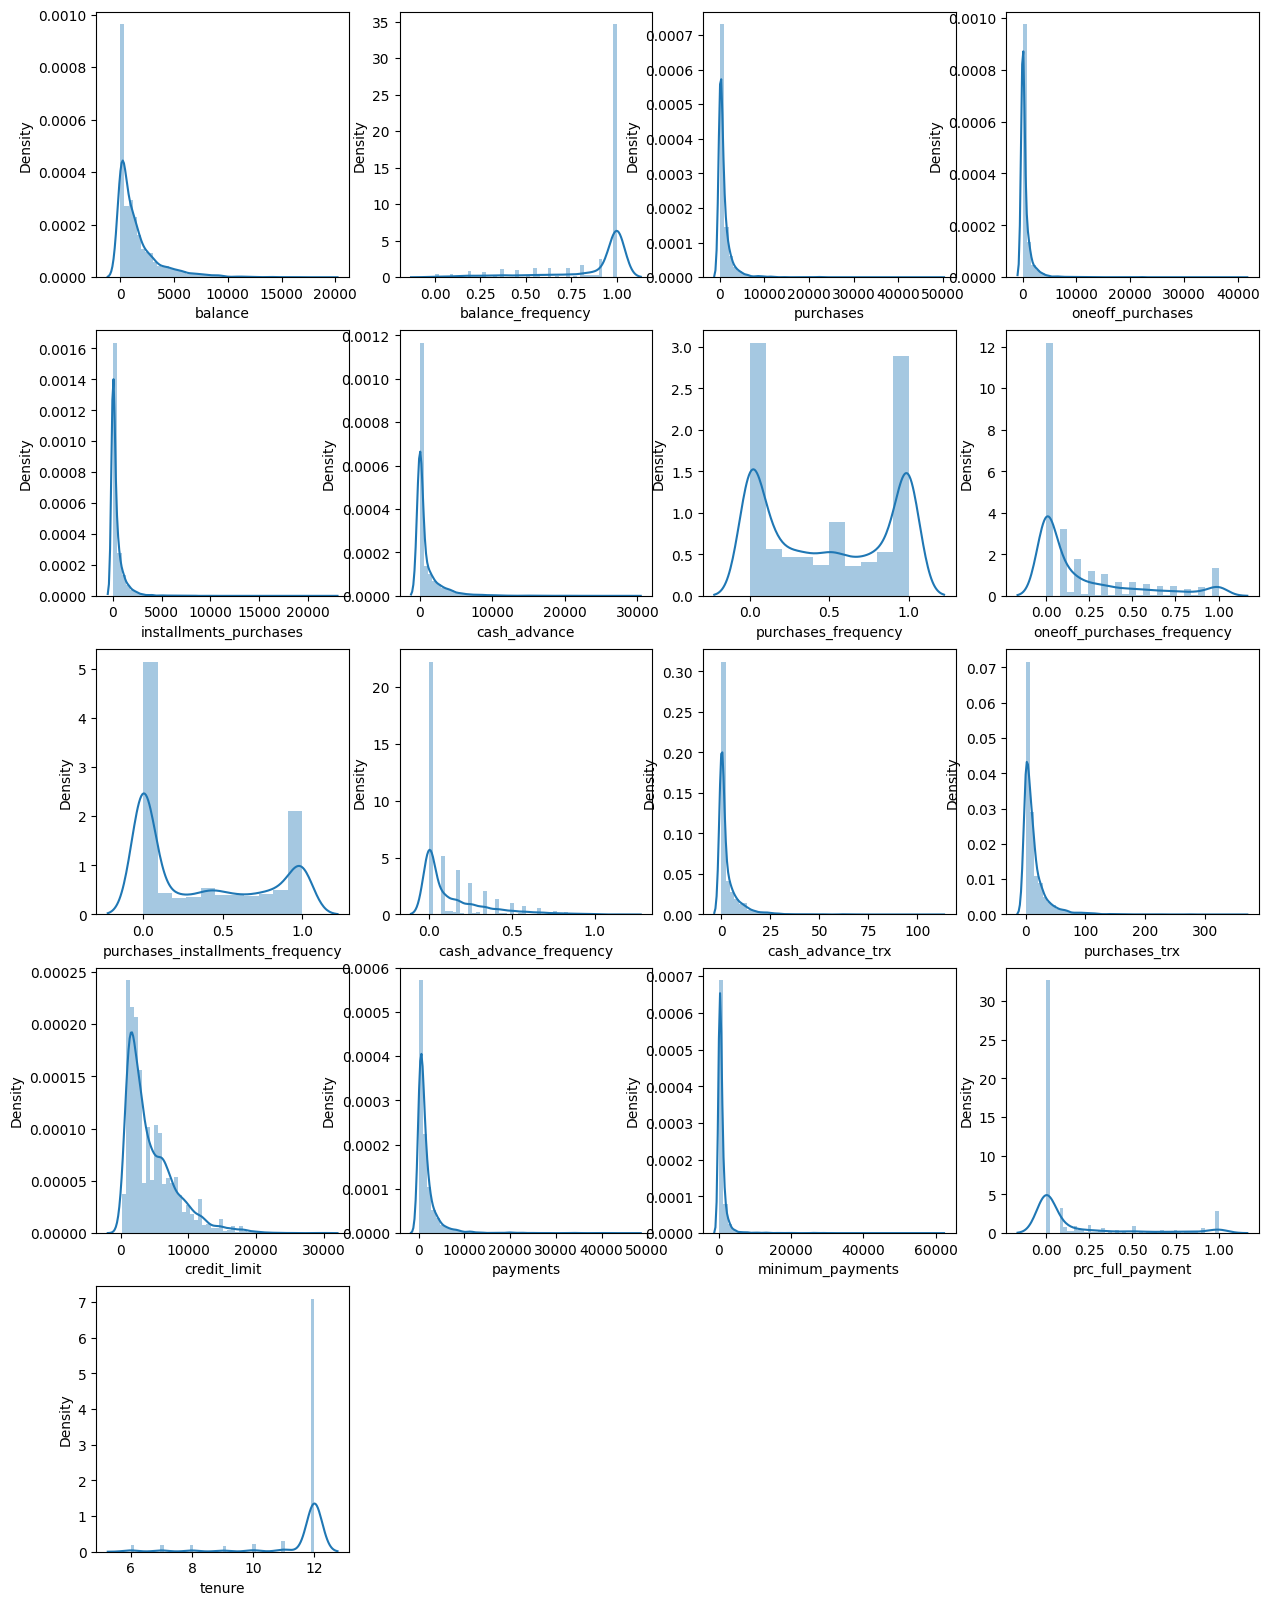

In [233]:
plt.figure(figsize=(15,20))

for i in enumerate(df[num_cols].describe().columns):
  plt.subplot(5,4, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

**Insight :**

Secara keseluruhan, berdasarkan analisis sebagian besar fitur dalam plot menunjukkan distribusi yang miring (skewed) / tidak normal dan terdapat beberapa outlier di sisi kanan, seperti purchases, cash_advance, minimum_payments dll. Oleh karena itu, data ini memerlukan penanganan lebih lanjut untuk menangani outlier, melakukan penskalaan, transformasi dan lain sebagainya untuk mengurangi skewness sebelum digunakan dalam analisis lanjutan, seperti segmentasi pelanggan atau modeling.

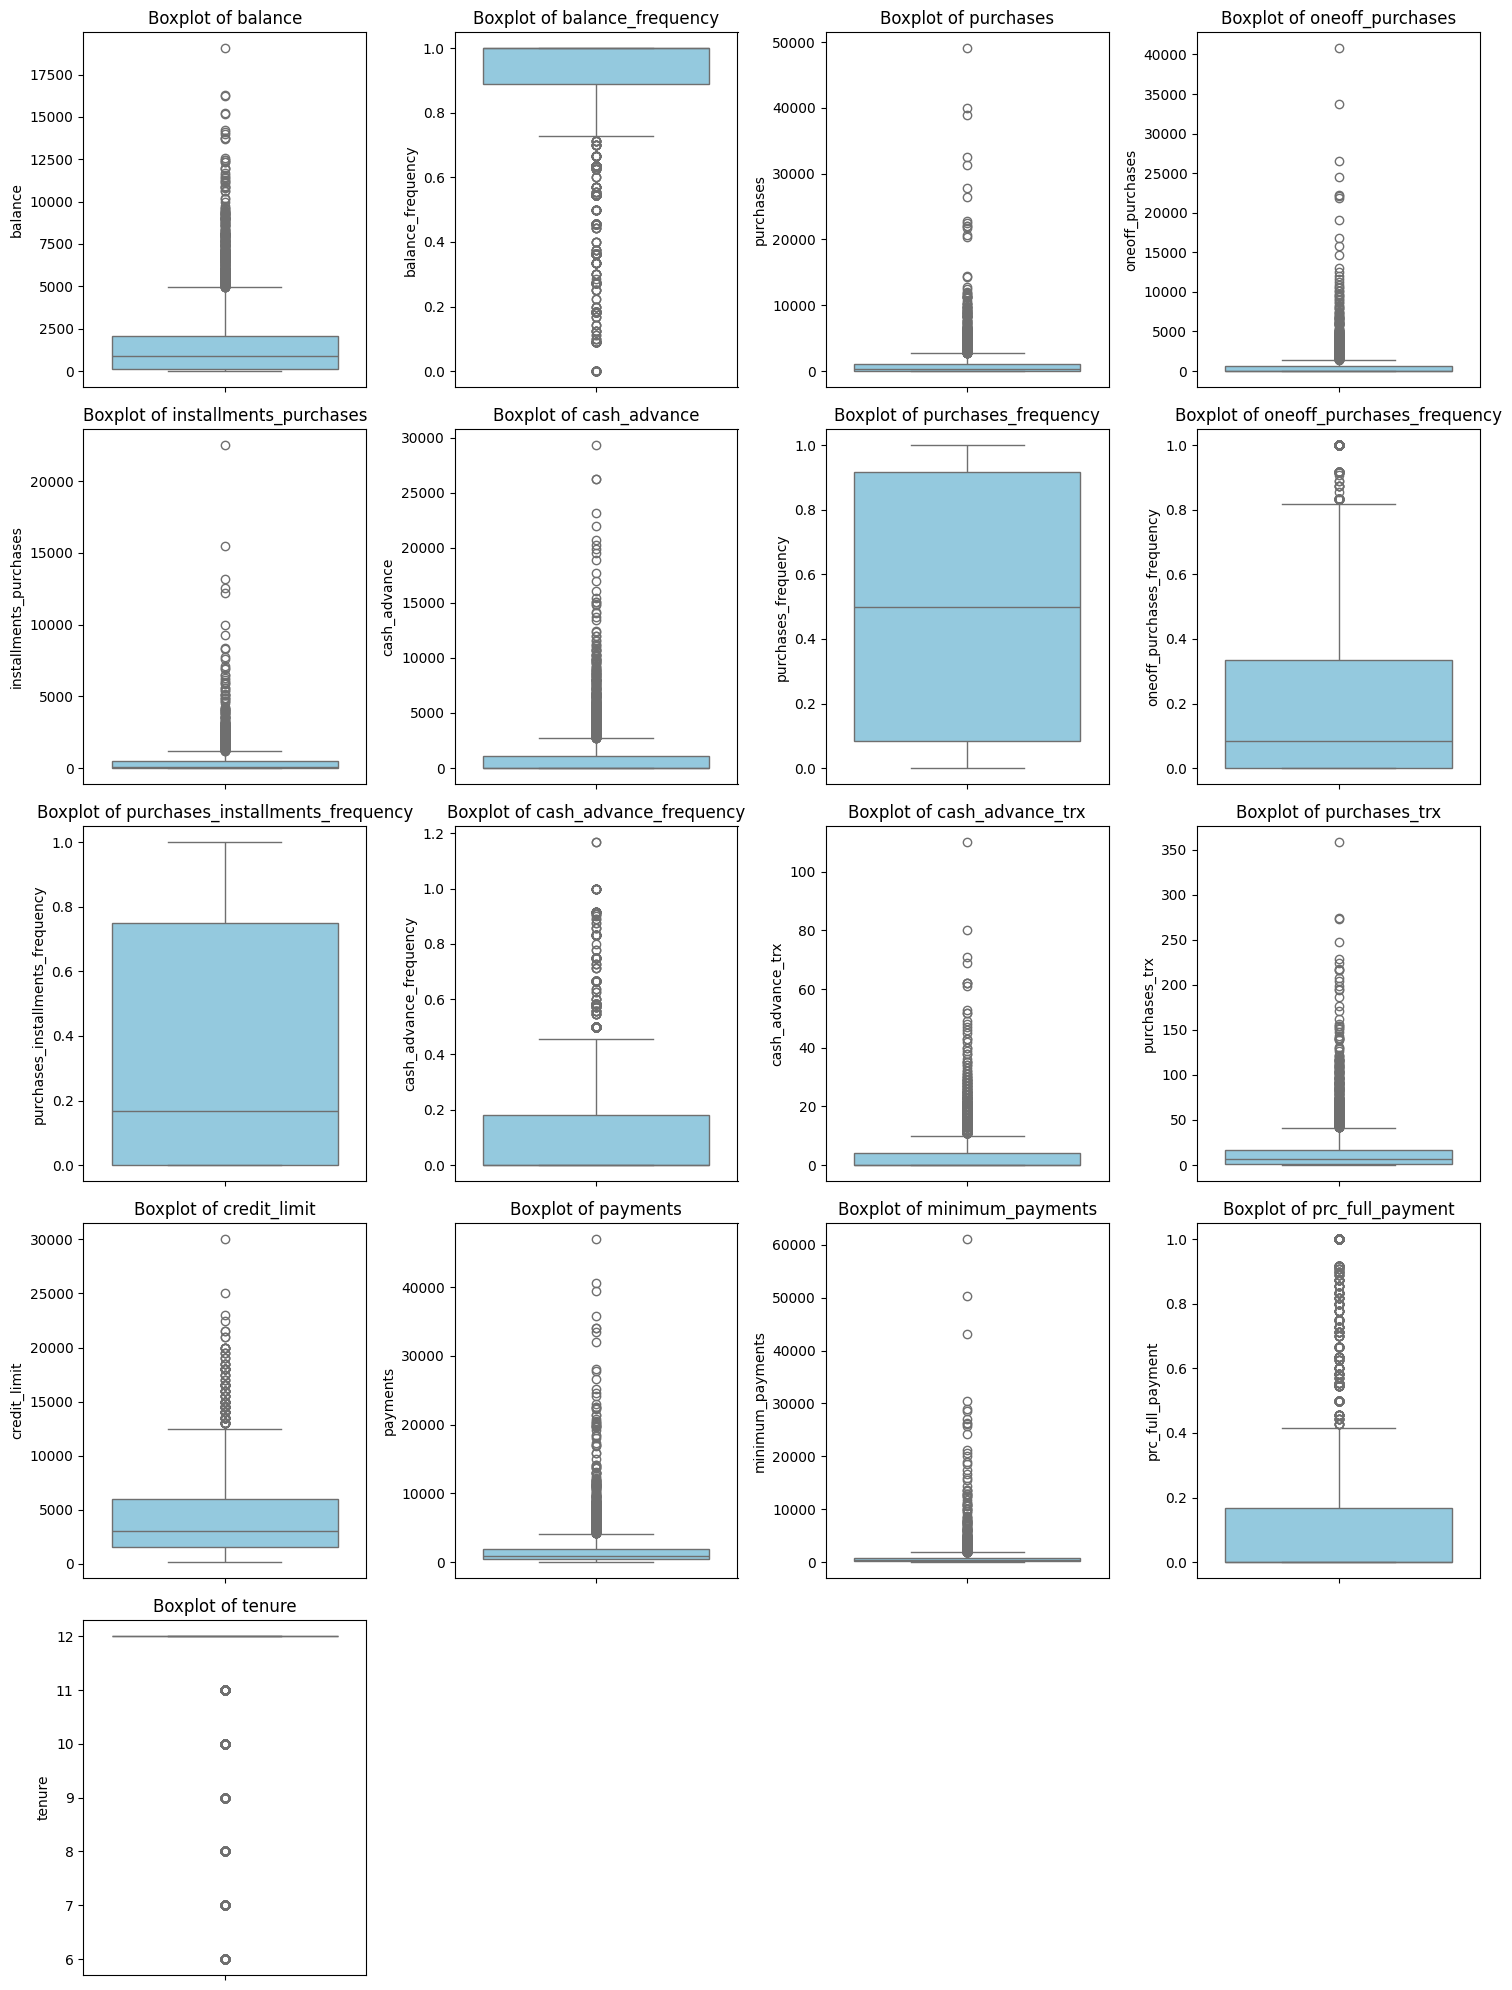

In [234]:
# Melihat persebaran outliers 
plt.figure(figsize=(15, 20))
for i, col in enumerate(df[num_cols], 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df[num_cols], y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**Insight :**

Secara keseluruhan, berdasarkan analisis secara sekilas sebagian besar fitur dalam boxplot memiliki nilai outliers. Hanya terdapat 2 kolom yang terlihat terdistribusi secara  normal yaitu kolom purchases_installments_frequency dan kolom purchases_frequency. Oleh karena itu, data ini memerlukan penanganan lebih lanjut untuk menangani nilai outliers, terlebih algoritma yang akan digunakan adalah K-Means clustering yang sensitive terhadap nilai outliers sebelum datanya digunakan dalam analisis lanjutan, seperti segmentasi pelanggan atau modeling.

## **4.2. Correlation Relationship**

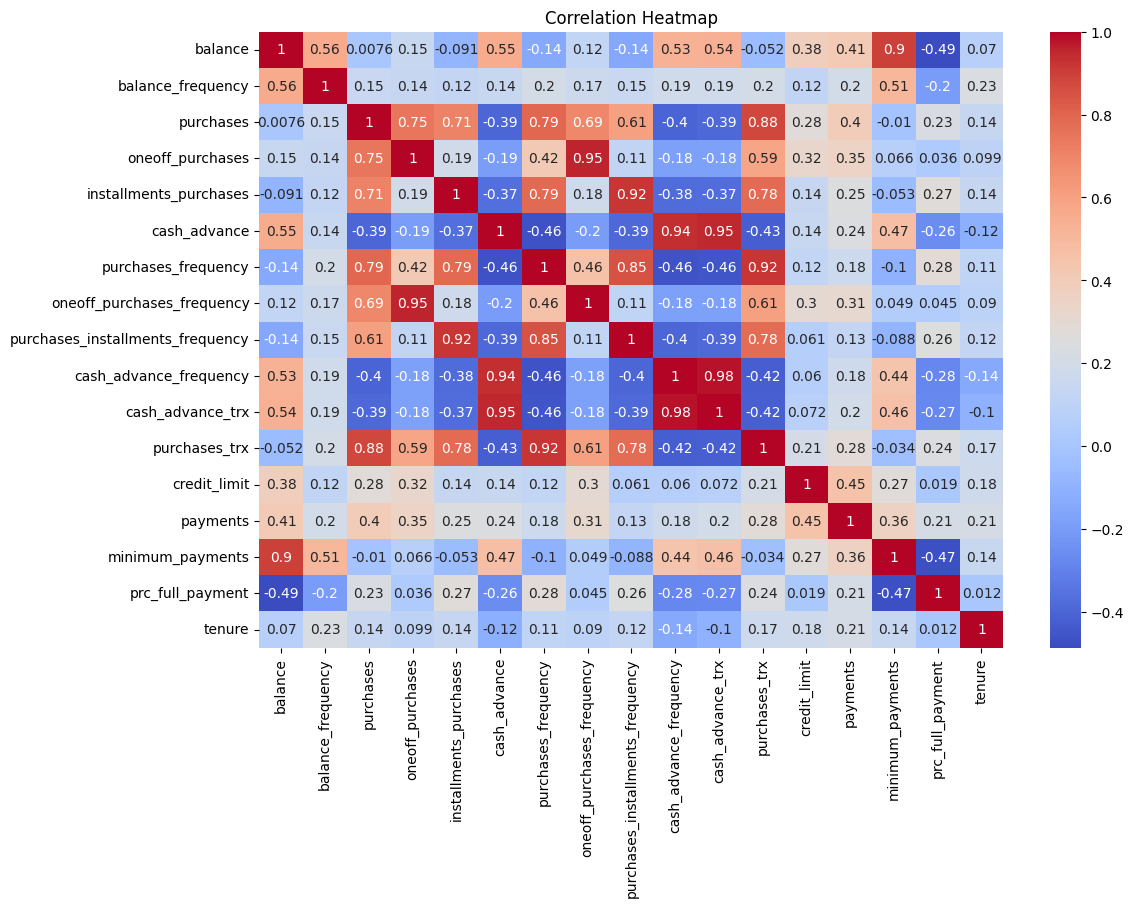

In [235]:
# Buat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt='.2g', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Insight :**

Heatmap korelasi di atas untuk melihat hubungan antar fitur, dimana secara keseluruhan hasilnya menunjukkan adanya hubungan kuat antara variabel yang mencerminkan pola perilaku, seperti frekuensi dan jenis transaksi, serta adanya korelasi negatif yang mengindikasikan terdapat perbedaan karakteristik antara kelompok pelanggan. Pola ini dapat digunakan untuk segmentasi dan analisis lebih lanjut.

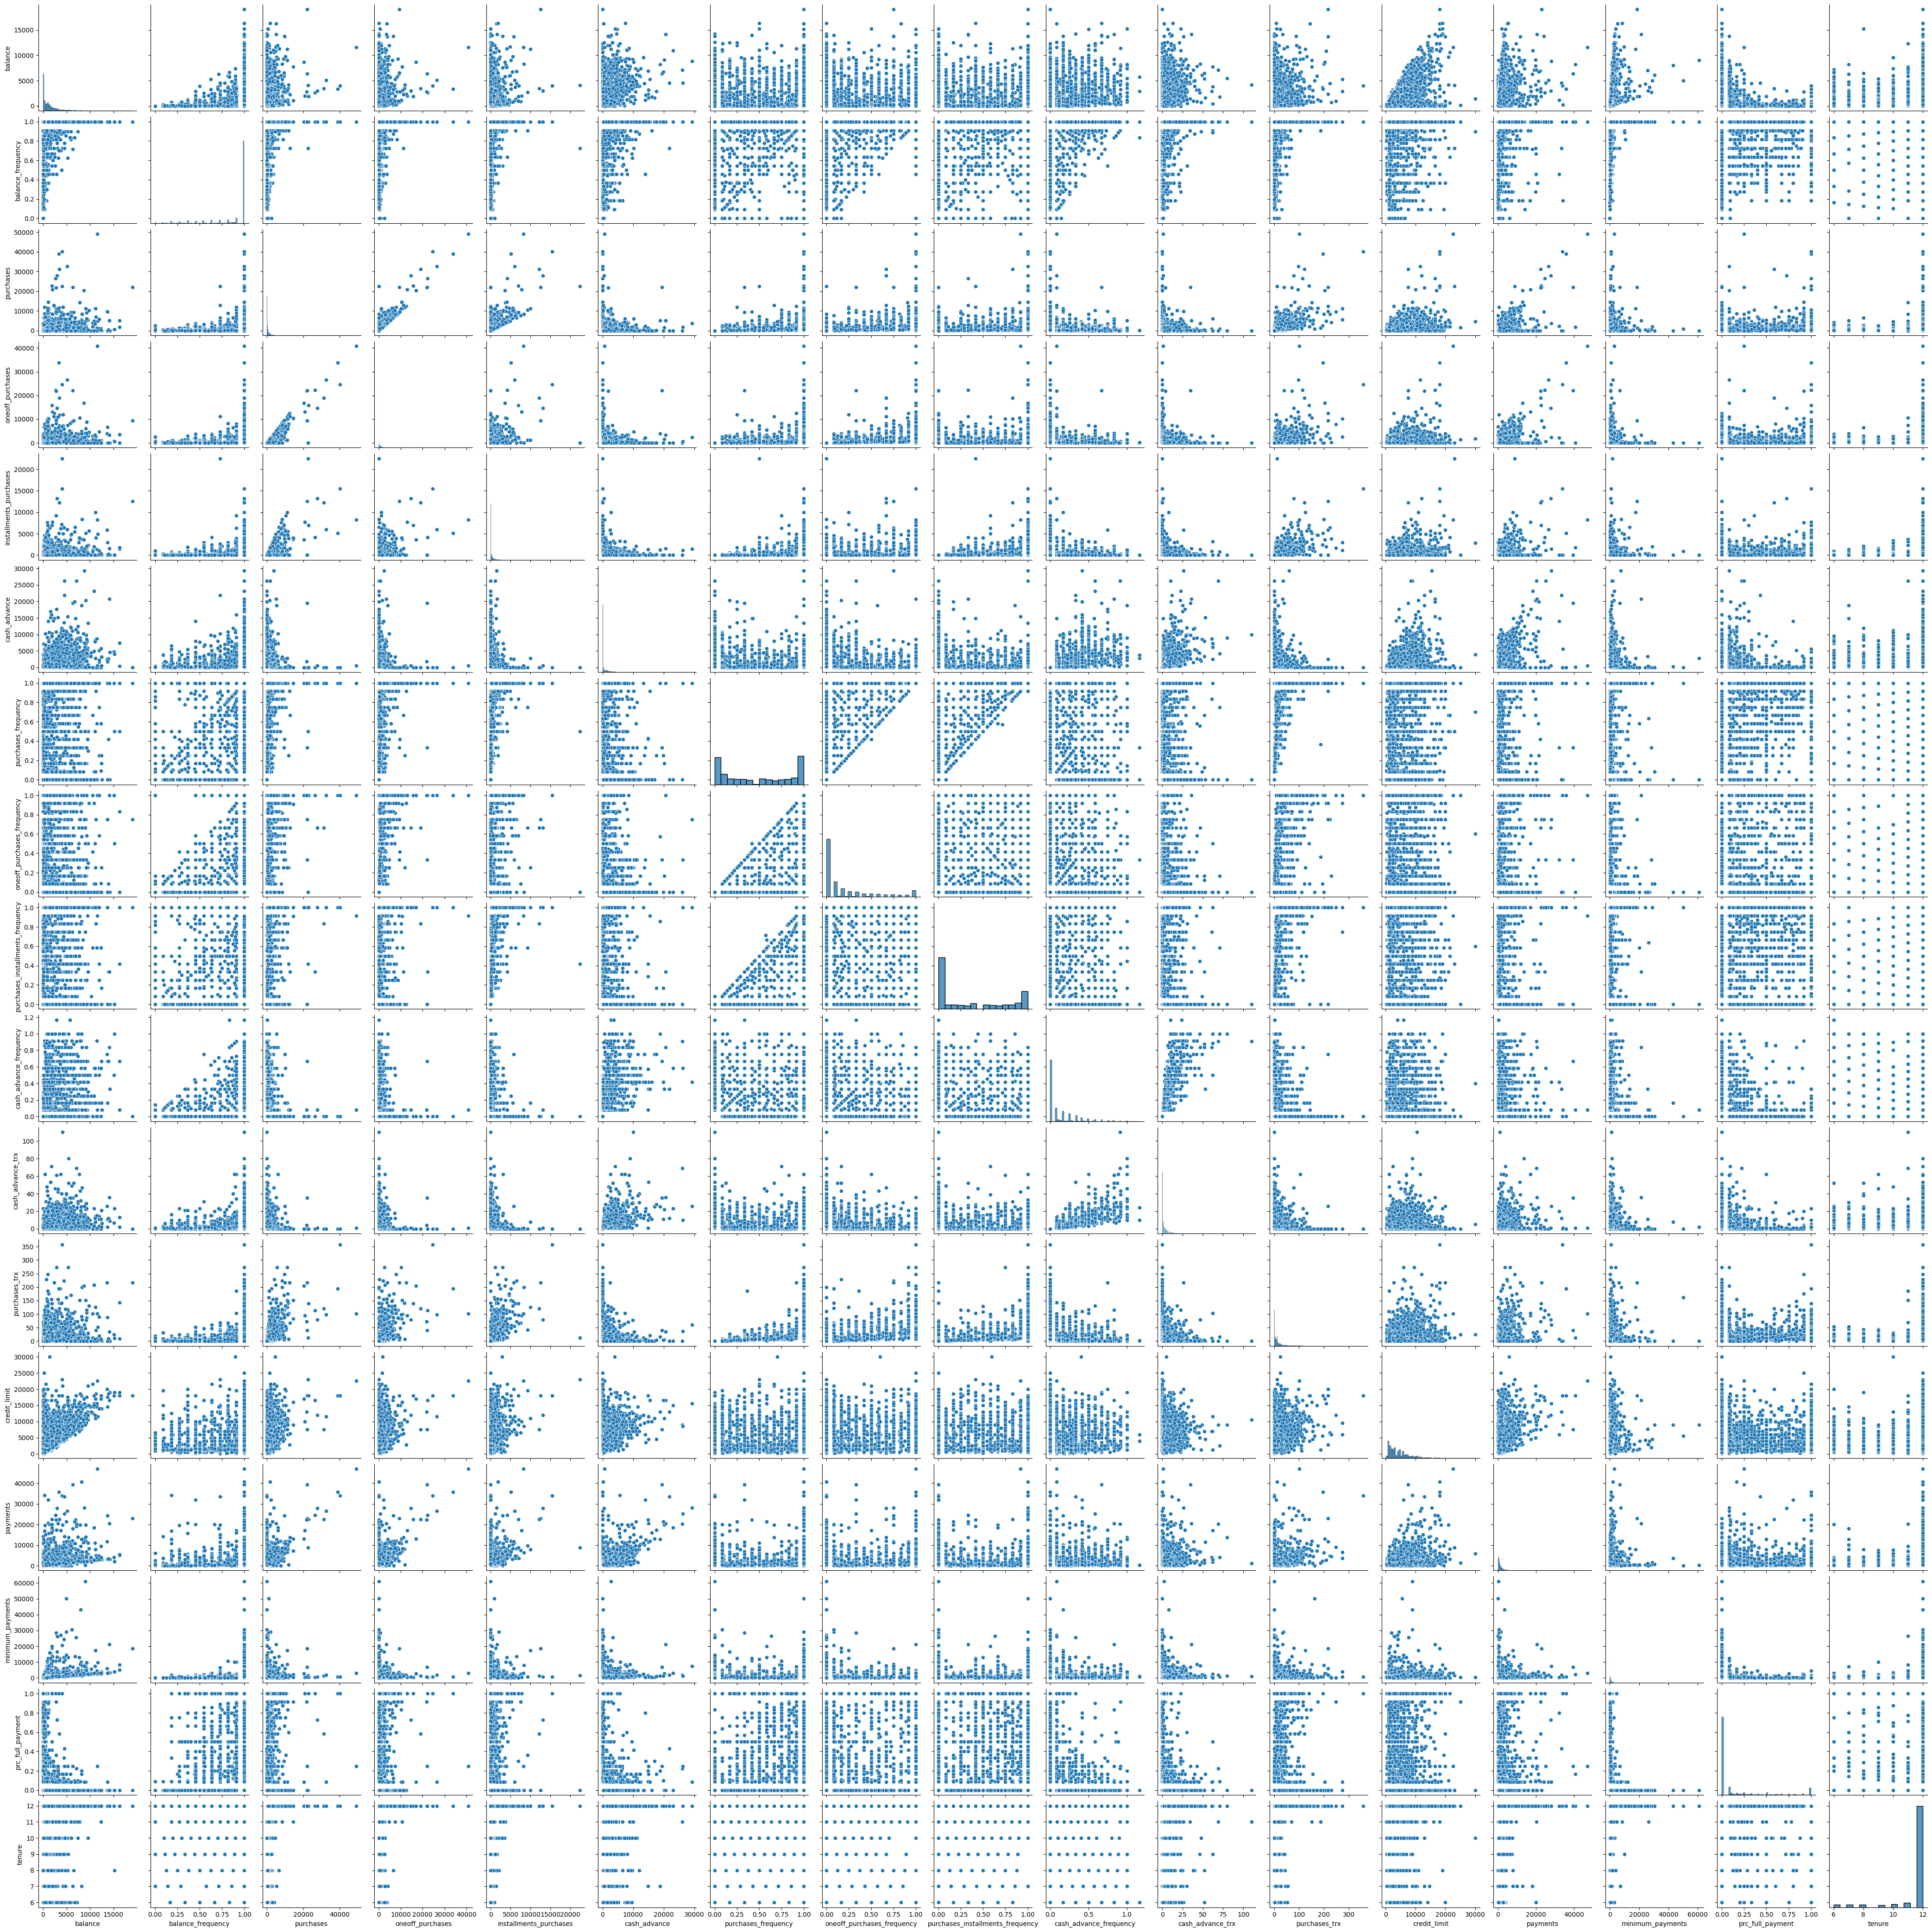

In [236]:
sns.pairplot(df[num_cols])

**Insight :**

Gambar pairplot di atas digunakan untuk memvisualisasikan distribusi data dan melihat hubungan antar variabel dalam dataset. Fungsi ini akan menampilkan histogram untuk menggambarkan distribusi masing-masing variabel dan scatter plot untuk menunjukkan hubungan antar pasangan variabel, sehingga memudahkan identifikasi pola atau korelasi untuk kebutuhan analisis lebih lanjut.





## **4.3. Influence of 'tenure' with the variables 'purchases', 'balance', and 'payments'**

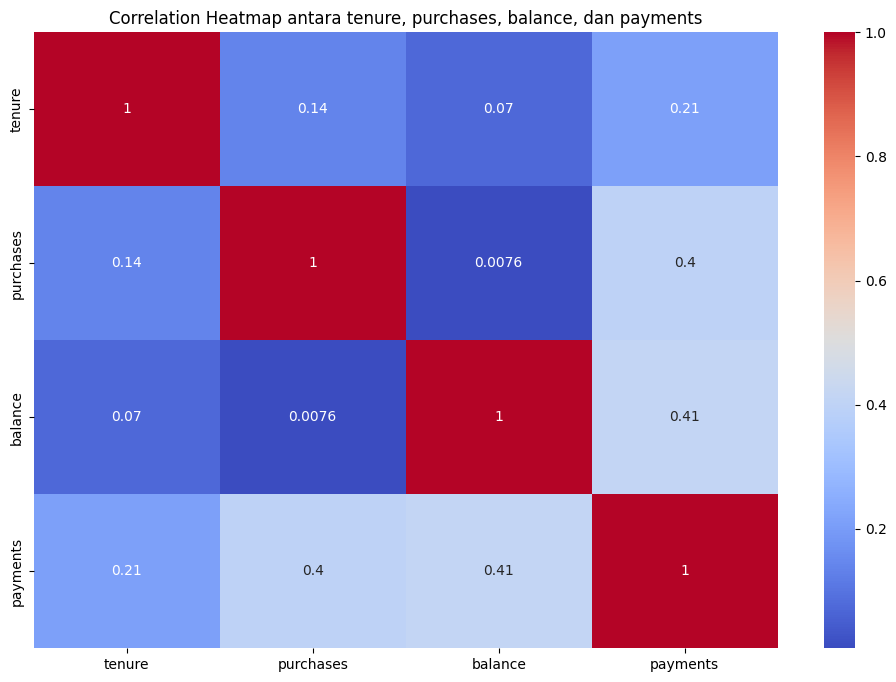

In [237]:

# Pilih kolom yang relevan untuk analisis korelasi
num_col = ['tenure', 'purchases', 'balance', 'payments']

# Hitung korelasi menggunakan metode Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_col].corr(method='spearman'), annot=True, fmt='.2g', cmap='coolwarm')

# Set judul
plt.title("Correlation Heatmap antara tenure, purchases, balance, dan payments")
plt.show()

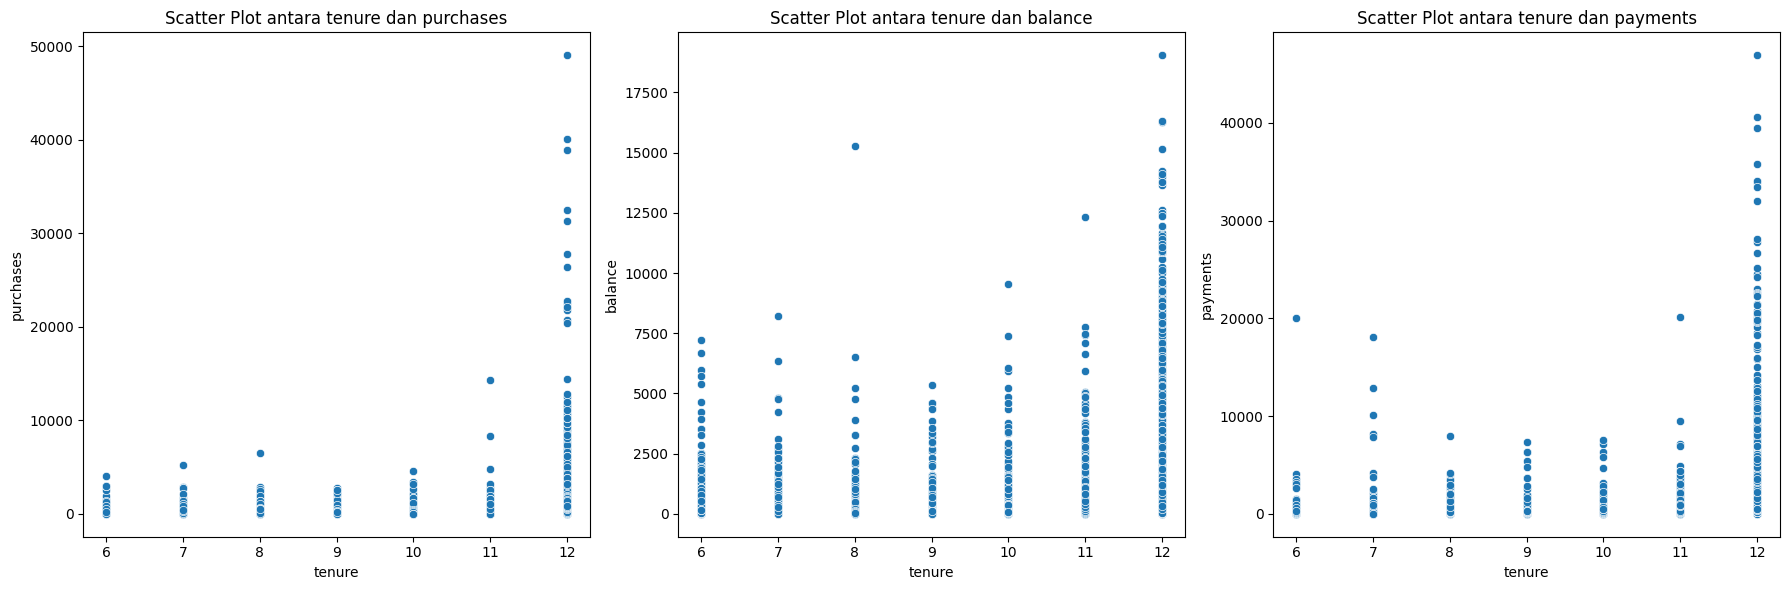

In [238]:
# Membuat subplot untuk scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot untuk tenure vs purchases
sns.scatterplot(x=df['tenure'], y=df['purchases'], ax=axes[0])
axes[0].set_title("Scatter Plot antara tenure dan purchases")
axes[0].set_xlabel("tenure")
axes[0].set_ylabel("purchases")

# Scatter plot untuk tenure vs balance
sns.scatterplot(x=df['tenure'], y=df['balance'], ax=axes[1])
axes[1].set_title("Scatter Plot antara tenure dan balance")
axes[1].set_xlabel("tenure")
axes[1].set_ylabel("balance")

# Scatter plot untuk tenure vs payments
sns.scatterplot(x=df['tenure'], y=df['payments'], ax=axes[2])
axes[2].set_title("Scatter Plot antara tenure dan payments")
axes[2].set_xlabel("tenure")
axes[2].set_ylabel("payments")

# Menampilkan plot
plt.tight_layout()
plt.show()


**Insight Heatmap dan distribusi :**

1. Berdasarkan heatmap korelasi terdapat hubungan yang positif antara purchase dan tenure yaitu sebesar 0.14, yang mengindikasikan terdapat hubungan yang relatif lemah antara kedua variabel tersebut. Kemudian berdasarkan scatter plot tenure dan purchases menunjukkan bahwa pelanggan dengan masa tenure yang lebih panjang yaitu 11-12 bulan memiliki pembelian yang lebih tinggi.

2. Berdasarkan heatmap korelasi terdapat hubungan yang sangat lemah ada hubungan antara tenure dengan balance yaitu sebesar 0.07. Kemudian berdasarkan hasil scatter plot tidak terlihat pola yang jelas antara tenure dan balance, yang menunjukkan hampir tidak adanya hubungan signifikan antara saldo pelanggan dengan masa keanggotaannya.

3. Berdasarkan heatmap korelasi terdapat hubungan yang positif antara tenure dan payments yaitu sebesar 0.21 hal ini menunjukkan terdapat hubungan yang sedikit lebih kuat dibanding purchases. Kemudian scatter plot antara tenure dan payments menunjukkan pola serupa, di mana pembayaran lebih tinggi terjadi pada pelanggan dengan masa layanan yang panjang. 

**Kesimpulan :**

Berdasarkan hasil di atas, terdapat pola yang menunjukkan bahwa tenure memiliki pengaruh terhadap purchases dan payments, meskipun hubungan dengan purchases relatif lemah dan dengan balance hampir tidak ada hubungan dan tidak ada pola yang jelas. Namun, hubungan antara tenure dan payments lebih jelas dan sedikit lebih kuat di mana pelanggan dengan masa masa keanggotaan yang lebih panjang cenderung melakukan pembayaran yang lebih tinggi

    

## **4.4. The effect of 'credit_limit' on 'purchases_frequency'**

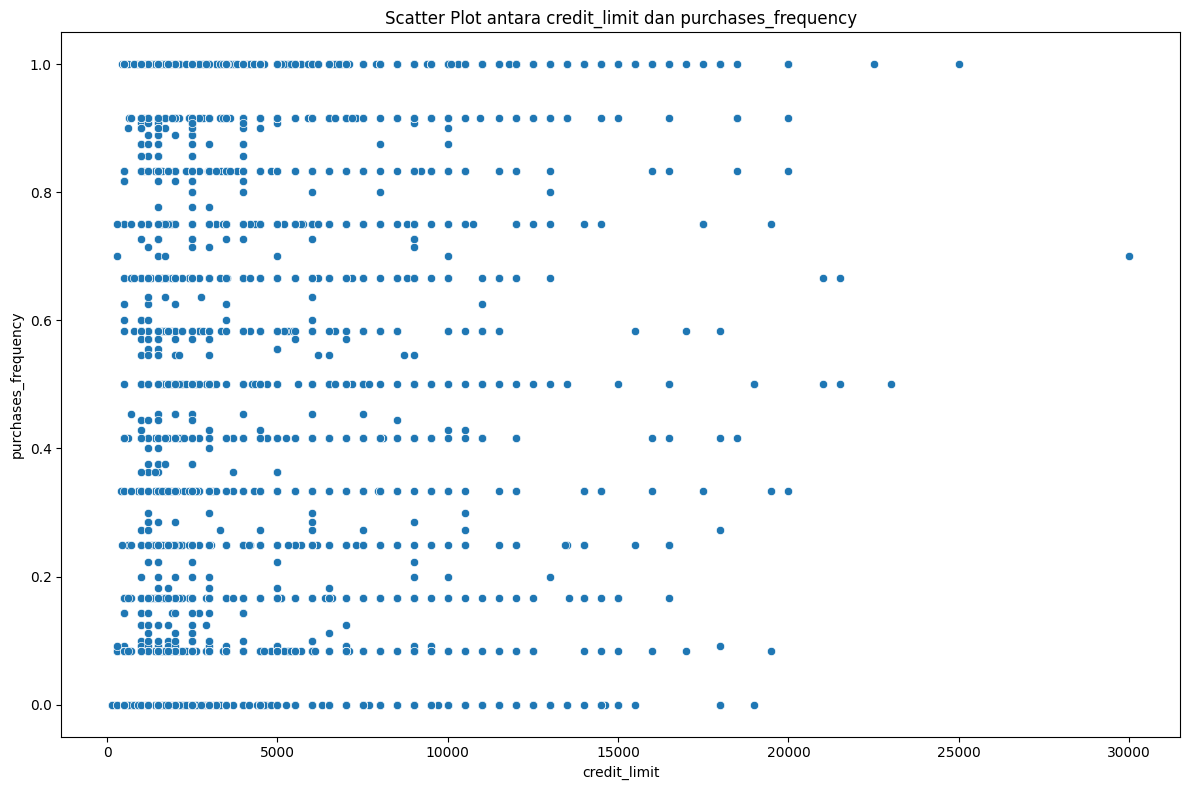

In [239]:
plt.figure(figsize=(12, 8))

# Scatter plot untuk credit_limit vs purchases_frequency
sns.scatterplot(x=df['credit_limit'], y=df['purchases_frequency'])

# Menambahkan judul dan label sumbu
plt.title("Scatter Plot antara credit_limit dan purchases_frequency")
plt.xlabel("credit_limit")
plt.ylabel("purchases_frequency")

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight :**

Berdasarkan scatter plot di atas, terlihat bahwa nasabah dengan credit_limit yang lebih tinggi cenderung memiliki purchase_frequency yang rendah, menunjukkan bahwa nasabah jarang melakukan transaksi pembelian. Sebaliknya, nasabah dengan credit_limit yang lebih rendah cenderung memiliki purchase_frequency yang tinggi, menandakan bahwa mereka sering melakukan transaksi pembelian.

# **5. Feature Engineering**


In [240]:
# Hanya menggunakan kolom numerical
X= df[num_cols]

# Melihat jumlah baris dan kolom
print(X.shape)

(4475, 17)


**Insgiht :**

Dari hasil di atas dapat dilihat bahwa data X terdiri dari 4475 baris dan 17 kolom



## **5.1. Handling Outliers**

Cara Handle Ouliers
1. **Trimming Outliers** >> Menghapus Outliers >> dapat menghilangkan informasi
    - Bisa dilakukan ketika perbandingan antara upper boundary, lower boundary, nilai minimum, dan nilai maksimum value pada kolom tersebut kurang meyakinkan. Misal ada umur 0 tahun.

2. **Retaining Outliers** >>  Mengganti outlier dengan nilai kosong
 dan lanjutkan dengan teknik imputasi data yang hilang
    - Bisa dilakukan ketika perbandingan antara upper boundary, lower boundary, nilai minimum, dan nilai maksimum value pada kolom tersebut masih make sense dan tidak terlalu jauh dari mean value nya. Seperti pace masih di range 0 - 100.

3. **Capping (Winsorizing/Censoring)** >> Membatasi distribusi variabel pada nilai maksimum dan/atau minimum >> tidak akan kehilangan informasi >> mengubah atau merusak pola atau bentuk distribusi data asli
    - Cara terakhir bila keduanya tidak masuk kriteria.

In [241]:
# Menghitung skewness dan mengklasifikasikan distribusinya
list_item = []

for col in num_cols:  # Pastikan num_cols adalah daftar nama kolom numerik
    skewness = round(df[col].skew(), 1)  # Hitung skewness untuk kolom
    distribution = 'normal' if -0.5 <= skewness <= 0.5 else 'skewed'  # Klasifikasi distribusi
    list_item.append([col, skewness, distribution])

# Menampilkan hasil distribusi skewness kolom dalam DataFrame
skew = pd.DataFrame(list_item, columns=['nama kolom', 'nilai skewness', 'distribution'])
skew

nama kolom  nilai skewness distribution
0                            balance             2.5       skewed
1                  balance_frequency            -2.0       skewed
2                          purchases             9.0       skewed
3                   oneoff_purchases            10.1       skewed
4             installments_purchases             8.1       skewed
5                       cash_advance             4.7       skewed
6                purchases_frequency             0.1       normal
7         oneoff_purchases_frequency             1.5       skewed
8   purchases_installments_frequency             0.5       normal
9             cash_advance_frequency             1.8       skewed
10                  cash_advance_trx             4.8       skewed
11                     purchases_trx             4.5       skewed
12                      credit_limit             1.5       skewed
13                          payments             6.0       skewed
14                  minimum_payments            12.4       skewed
15                  prc_full_payment             1.9       skewed
16                            tenure            -2.9       skewed

**Insight :**

Dari hasil di atas, dapat dilihat bahwa hampir semua data terdistribusi tidak normal kecuali kolom 'purchases_frequency' dan kolom 'purchases_installments_frequency'. Dimana kolom yang terdistribusi tidak normal berjumlah 15 kolom, 2 kolom terindikasi skew negatif yaitu kolom 'balance_frequency' dan 'tenure', sisanya terdapat 13 kolom yang skew positif. Selanjutnya, akan dilihat batas atas dan batas bawah dan presentase outlier pada masing-masing kolom.

In [242]:
# Menentukan batas atas, batas bawah, dan persentase outliers untuk setiap kolom

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

# Perhitungan batas dan persentase outliers berdasarkan distribusi skewness
for row in range (0, len(skew)):
  col = skew['nama kolom'][row]
  if skew['distribution'][row] == 'skewed':
    # Jika distribusi skewed, hitung dengan IQR
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (IQR * 3)
    upper_boundary = df[col].quantile(0.75) + (IQR * 3)
  else:
    # Jika normal, hitung dengan nilai mean dan std
    lower_boundary = df[col].mean() - 3* df[col].std()
    upper_boundary = df[col].mean() + 3* df[col].std()

  # Menambahkan hasil ke dalam list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(df[df[col] > upper_boundary]) / len(df) * 100) +
            (len(df[df[col] < lower_boundary]) / len(df) * 100))
  percent_total_outlier.append(totout)

# Menyusun hasil perhitungan dalam DataFrame
outliers = pd.DataFrame({
    'column': column,
    'upper_boundary': [round(upper_bound, 2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound, 2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier, 2) for percent_total_outlier in percent_total_outlier]
})

outliers

column  upper_boundary  lower_boundary  \
0                            balance         7836.47        -5645.41   
1                  balance_frequency            1.33            0.56   
2                          purchases         4370.36        -3207.66   
3                   oneoff_purchases         2321.28        -1740.96   
4             installments_purchases         1937.02        -1452.76   
5                       cash_advance         4394.28        -3295.71   
6                purchases_frequency            1.69           -0.71   
7         oneoff_purchases_frequency            1.33           -1.00   
8   purchases_installments_frequency            1.56           -0.83   
9             cash_advance_frequency            0.73           -0.55   
10                  cash_advance_trx           16.00          -12.00   
11                     purchases_trx           65.00          -47.00   
12                      credit_limit        19500.00       -12000.00   
13                          payments         6413.22        -4127.05   
14                  minimum_payments         2812.14        -1811.93   
15                  prc_full_payment            0.67           -0.50   
16                            tenure           12.00           12.00   

    percentage_total_outlier  
0                       2.28  
1                      13.01  
2                       4.07  
3                       6.23  
4                       4.11  
5                       5.47  
6                       0.00  
7                       0.00  
8                       0.00  
9                       2.35  
10                      4.00  
11                      3.73  
12                      0.31  
13                      4.38  
14                      4.49  
15                     10.30  
16                     14.93

**Insight :**

- Berdasarkan hasil persentase outlier terdapat beberapa kolom yang persentase outliernya terdapat 5 kolom yang persentase outliersnya di atas 5 % yaitu kolom 'balance_frequency', 'oneoff_purchases', 'cash_advance', 'prc_full_payment', dan 'tenure'. Kemudian terdapat 9 kolom yang persentase otliersnya di bawah 5%.

**Kesimpulan :**

Karena algoritma K-Means sensitif terhadap outlier, perlu dilakukan penanganan terhadap outlier yang ada pada data.

- Untuk kolom 'balance_frequency', 'oneoff_purchases', 'cash_advance', dan 'prc_full_payment' yang persentase outliersnya di atas 5% akan di handle menggunakan winsorizing. 
- Untuk kolom 'tenure' tidak akan di handle karena jumlah nilai unik pada kolom tenure terbatas yang menunjukkan bahwa data tersebut sudah mencakup rentang yang relevan  kemungkinan outliers pada kolom tenure adalah bagian dari distribusi yang wajar dan tidak mempengaruhi kesimpulan analisis secara signifikan
- Untuk kolom di bawah 5% maka outilers tidak akan di handle karena keberadaanya tidak akan terlalu mempengaruhi model secara keseluruhan.

Dengan penanganan outlier yang tepat, diharapkan hasil clustering menggunakan K-Means dapat lebih akurat dan mencerminkan pola yang lebih representatif dalam data

In [243]:
X

balance  balance_frequency  purchases  oneoff_purchases  \
0       16.581535           0.125000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.125000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      installments_purchases  cash_advance  purchases_frequency  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         payments  minimum_payments  prc_full_payment  tenure  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039

In [244]:
from feature_engine.outliers import Winsorizer


# Membuat objek Winsorizer dengan parameter yang diinginkan
winsorizer = Winsorizer(capping_method='iqr',
                        tail='both', 
                        fold=1.5,
                        variables=['balance_frequency', 'oneoff_purchases', 'cash_advance', 
                                   'prc_full_payment'])

# Menerapkan Winsorizer pada data X
X = winsorizer.fit_transform(X)

**Insight :**

Hasil kode di atas adalah untuk mengandle outliers pada kolom 'balance_frequency', 'oneoff_purchases', 'cash_advance', dan 'prc_full_payment' dengan teknik winsorizer.

## **5.2. Handling Missing Values**

Tipe Missing Values
1. ***MCAR (Missing Completely At Random)***
    - Tidak terkait dengan kolom lain (kesalahan input, human error).
    - Penyebab tidak diketahui, pola hilang acak.
    - Peluang hilang sama untuk semua data.
    - Tidak menyebabkan bias jika jumlahnya kecil.


2. ***MAR (Missing At Random)***
    - Ada pola hubungan dengan kolom lain yang terobservasi.
    - Penyebab bisa diketahui dari data.
    - MNAR (Missing Not At Random)

3. ***MNAR (Missing Not At Random)***
    - Hilangnya data terkait nilai lain yang juga hilang (tidak tercatat).
    - Ada mekanisme yang menyebabkan data hilang.

Cara Handling Missing Values
1. **MAR/MCAR**
    - Gunakan Multiple Imputation (untuk distribusi normal/gaussian) - atau Median Imputation (untuk distribusi skewed).
    - Maximum Likelihood juga merupakan metode yang dapat diterapkan.

2. **MNAR**
    - Tidak disarankan menggunakan Simple Imputation, lebih baik menggunakan flagging untuk memprediksi target.
    - Strategi penanganan:
        - Temukan lebih banyak data tentang penyebab hilangnya data.
        - Lakukan analisis bagaimana-jika (what-if analysis) untuk menilai sensitivitas hasil dalam berbagai skenario.



***Berdasarkan hasil analisis sebelumnya terdapat  1 missing value pada kolom 'credit_limit' dan 158 missing values pada kolom 'minimum_payments'***

In [245]:
X.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    158
prc_full_payment                      0
tenure                                0
dtype: int64

### **5.2.1. Handling Missing Values for Column 'credit_limit'**

Nilai missing values pada kolom 'credit_limit' akan di drop karena mengingat jumlahnya yang hanya 1 dari keseluruhan data sehingga penghapusan missing values tidak akan mempengaruhi hasil analisis dan modeling secara keseluruhan

In [246]:
# Hapus baris dengan nilai missing pada kolom 'credit_limit'
X = X.dropna(subset=['credit_limit'])

# Hapus baris dengan nilai missing pada kolom 'credit_limit' dalam dataset asli
df = df.dropna(subset=['credit_limit'])

**Insight :**

Dari hasil di atas dilakukan juga penghapusan pada dataset asli agar konsistensi data tetap terjaga, dan agar 
informasi penting terkait perilaku pengguna kartu kredit tidak hilang. Dengan memiliki 
data yang lengkap

In [247]:
# Mengecek kembali nilai missing values yang hilang
X.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          0
payments                              0
minimum_payments                    158
prc_full_payment                      0
tenure                                0
dtype: int64

**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa misisng values pada kolom 'credit_limit' berhasil di handle


### **5.2.2. Handling Missing Values for Column 'minimum_payments'**

Berdasarkan hasil analisis, nilai missing pada kolom 'minimum_payments' termasuk dalam kategori Missing at Random (MAR), yang berarti ada pola hubungan dengan kolom lain yang terobservasi. Kolom 'minimum_payments' memiliki hubungan dengan kolom 'payments', di mana jika nilai pada kolom 'payments' adalah 0, maka nilai pada kolom 'minimum_payments' juga cenderung 0. Oleh karena itu, untuk mengatasi missing values pada kolom 'minimum_payments', akan digunakan Multiple Imputation dengan pendekatan Median Imputation (mengisi nilai kosong dengan nilai tengah). Pendekatan ini dipilih karena distribusi kolom 'minimum_payments' tidak normal, sehingga median imputation dianggap lebih tepat daripada rata-rata

In [248]:
# Tangani missing values pada kolom 'minimum_payments' dengan median
X['minimum_payments'] = X['minimum_payments'].fillna(X['minimum_payments'].median())

In [249]:
# Mengecek kembali nilai missing values yang hilang
X.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa misisng values pada kolom 'minimum_payments' berhasil di handle

## **5.3. Scaling**

In [281]:
# Melakukan scaling pada kolom Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **5.4. PCA (Principal Component Analysis)**

In [251]:
# Reduksi dimensi data menggunakan PCA 
pca = PCA()

# Melatih model PCA pada data hasil scaling
pca.fit(X_scaled)

PCA()

**Insight :**

Dari kode di atas kita melakukan feature scaling dengan StandarScaler() untuk memastikan semua fitur memiliki skala yang sama. Kemudian dilakukan PCA untuk mereduksi / mengurangi dimensi data.

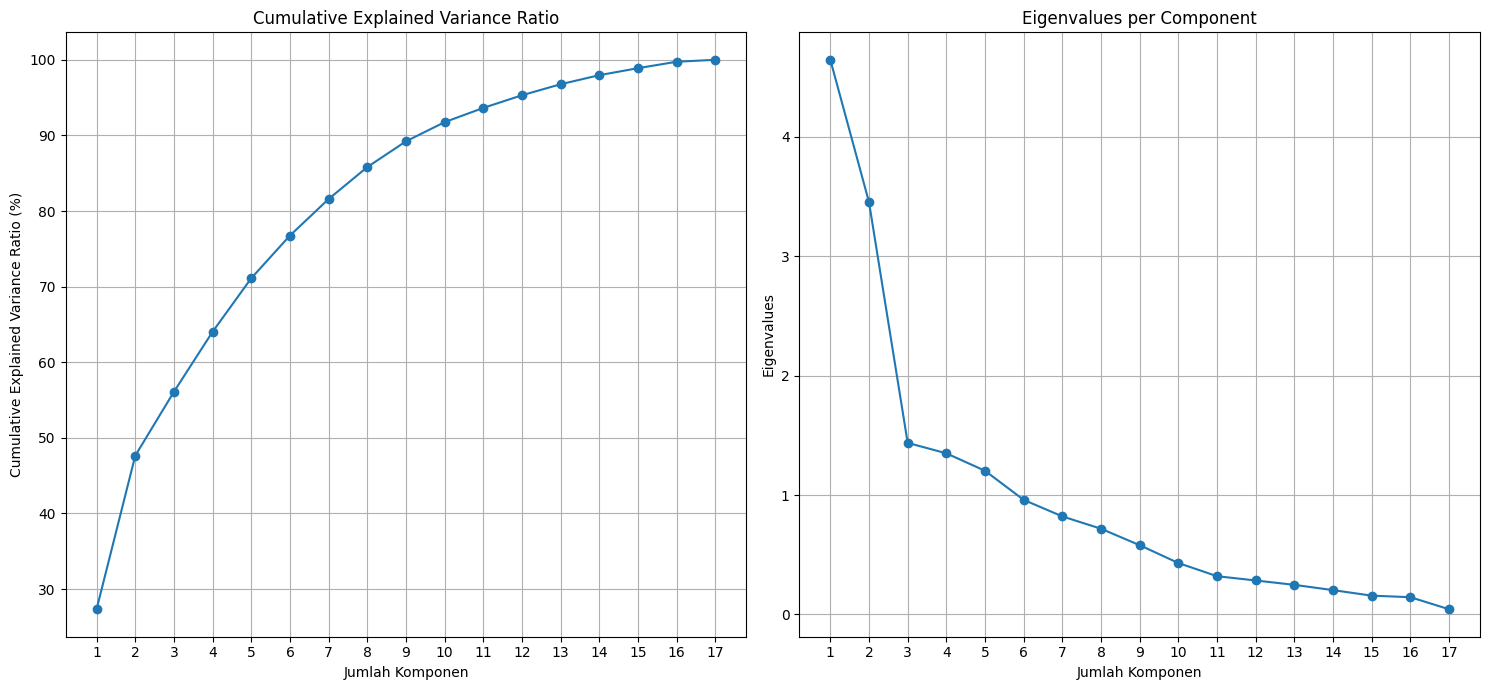

In [252]:
# Plot the Cumulative of Explained Variance Ratio
plt.figure(figsize=(15, 7))

# Plot Cumulative Explained Variance Ratio
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100), marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance Ratio (%)')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 18))  # Menampilkan setiap komponen di sumbu x

# Plot Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_, marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues per Component')
plt.xticks(range(1, 18))
plt.tight_layout()
plt.show()

**Insight :**

"Dari grafik Cumulative Explained Variance Ratio, dapat dilihat bahwa untuk mempertahankan informasi sekitar 80% hingga 95%, jumlah fitur yang dibutuhkan berkisar antara 7 hingga 12. Namun, jika pemilihan dilakukan berdasarkan grafik eigenvalue, jumlah fitur yang dipilih sebaiknya memiliki eigenvalue lebih besar dari 1.

Pemilihan fitur berdasarkan eigenvalue kurang disarankan karena tidak memberikan gambaran yang jelas mengenai seberapa banyak informasi yang hilang. Oleh karena itu, jumlah fitur akan ditentukan berdasarkan explained variance ratio.

Berdasarkan hasil analisis, jumlah komponen utama (n_components) akan ditentukan menggunakan grafik Cumulative Explained Variance Ratio

In [253]:
# Mengecek jumlah fitur yang perlu dipertahankan jika ingin mempertahankan 90% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.90) + 1
num_features

10

**Insight :**

Untuk mempertahankan 90% informasi dari data berdasarkan analisis PCA, diperlukan 10 fitur utama. Hal ini berarti jumlah kolom yang semula 17 akan direduksi menjadi 10 kolom.

In [254]:
# Latih model PCA dengan 10 fitur / komponen utama
pca = PCA(n_components=10)

# Melatih model PCA pada data yang sudah di scaling
pca.fit(X_scaled)

# Transformasi data yang sudah diskalakan dengan PCA
X_scaled_pca = pca.transform(X_scaled)

**Insight :**

Model PCA telah berhasil dilatih dengan 10 fitur utama menggunakan data yang telahdi skalakan. Kemudian dilakukan transformasi pca, dimensi data yang awalnya terdiri dari 17 fitur direduksi menjadi 10 fitur utama. Meski jumlah fitur berkurang, transformasi data tetap mempertahankan sekitar 90% informasi penting dari data asli, sehingga analisis tetap akurat dan efisien tanpa kehilangan banyak detail signifikan. 


# **6. Model Definition**

## **6.1. K-Means Clustering**

K-Means Clustering adalah model / algoritma yang akan digunakan untuk analisi data pelanggan berdasarkan pola pengeluaran dan transaksi mereka. Algoritma ini berkerja dengan menggunakan metrik jarak seperti Euclidean distance untuk mengelompokkan data numerik. K-Means adalah model yang cepat, sederhana, dan efektif untuk dataset besar, hal ini akan memudahkan segmentasi pelanggan berdasarkan kesamaan perilakunya. Kemudian algoritma ini bekerja dengan menginisialisasi centroid secara acak dan mengulang proses hingga nilainya konvergen. Penentuan jumlah klaster dapat dilakukan dengan menggunakan teknik  Elbow Method atau Silhouette Score untuk mendapatkan hasil kluster yang terbaik.



## **6.2. Elbow Method**

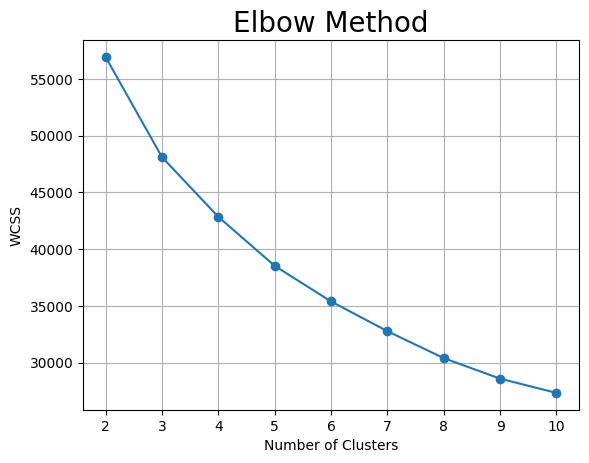

In [255]:
# Temukan jumlah cluster optimal menggunakan Metode Elbow
from sklearn.cluster import KMeans

wcss = [] #menjadi y axis
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300, # berjalan hingga anggota kluster tidak berubah
                n_init = 10, 
                random_state = random_state)
    km.fit(X_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Insight :**

Berdasarkan grafik di atas, dapat dilihat bahwa titik elbow yang paling optimal berada di sekitar 4 atau 5 klaster. Pada titik tersebut, penurunan nilai inersia mulai melambat secara signifikan, menunjukkan bahwa menambah jumlah klaster diatas 5 hanya memberikan sedikit pengurangan variasi dalam data. Oleh karena itu, memilih jumlah klaster lebih dari 5 dianggap kurang efektif.

## **6.3. Silhouette Score and Silhouette Plot**

In [256]:
# Fungsi untuk membuat Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.21582518031660802
For n_clusters = 3 The average silhouette_score is : 0.23660068144039653
For n_clusters = 4 The average silhouette_score is : 0.20165605042500756
For n_clusters = 5 The average silhouette_score is : 0.2178238801822665
For n_clusters = 6 The average silhouette_score is : 0.21937696706956528
For n_clusters = 7 The average silhouette_score is : 0.2355388760363848
For n_clusters = 8 The average silhouette_score is : 0.24016459597609996
For n_clusters = 9 The average silhouette_score is : 0.23863219733960053


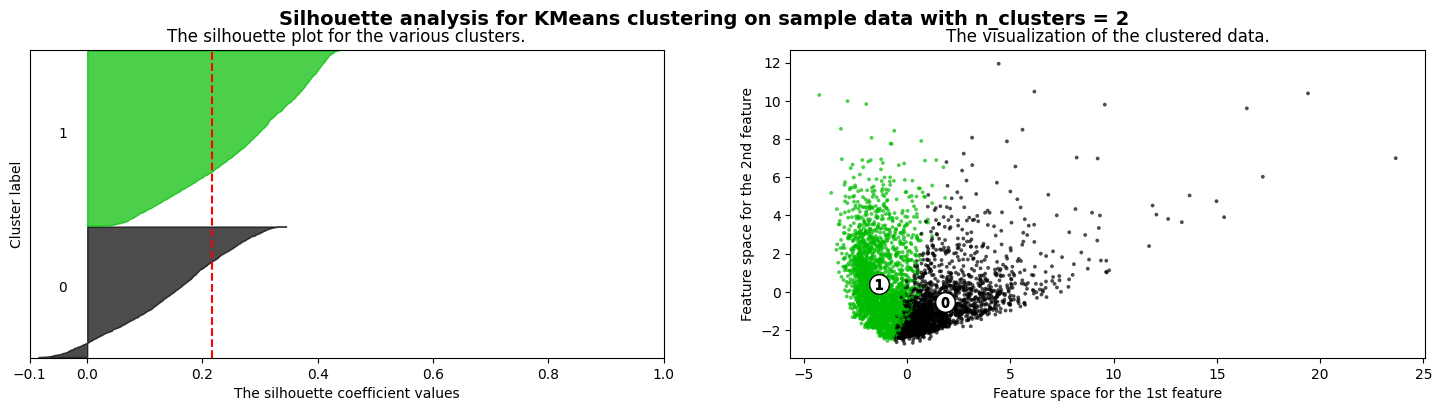

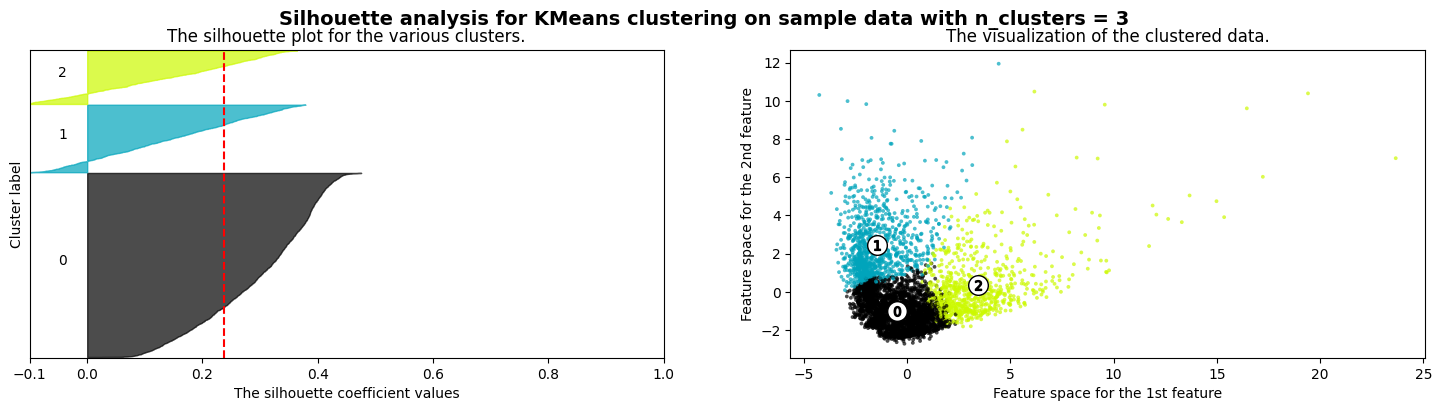

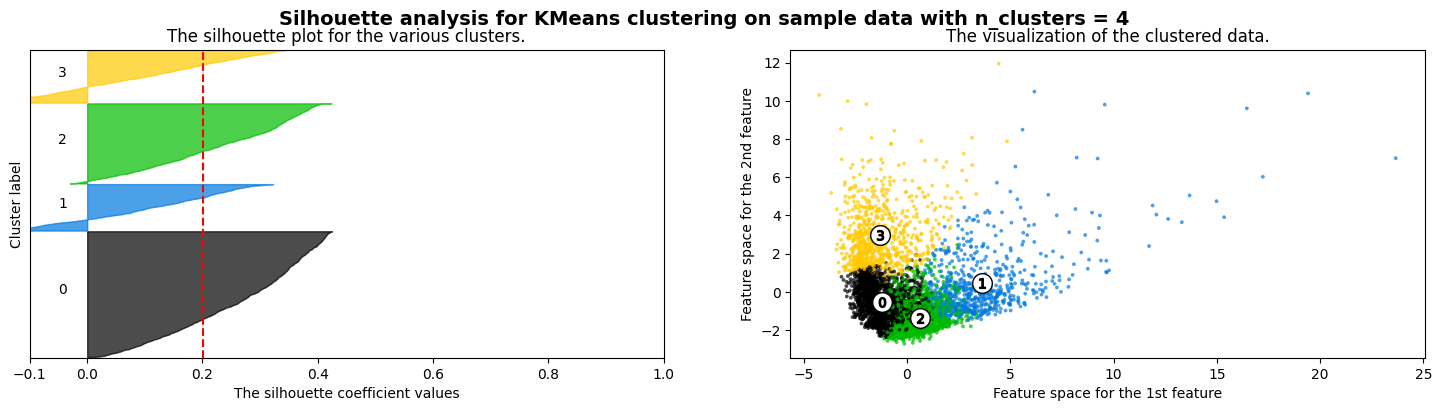

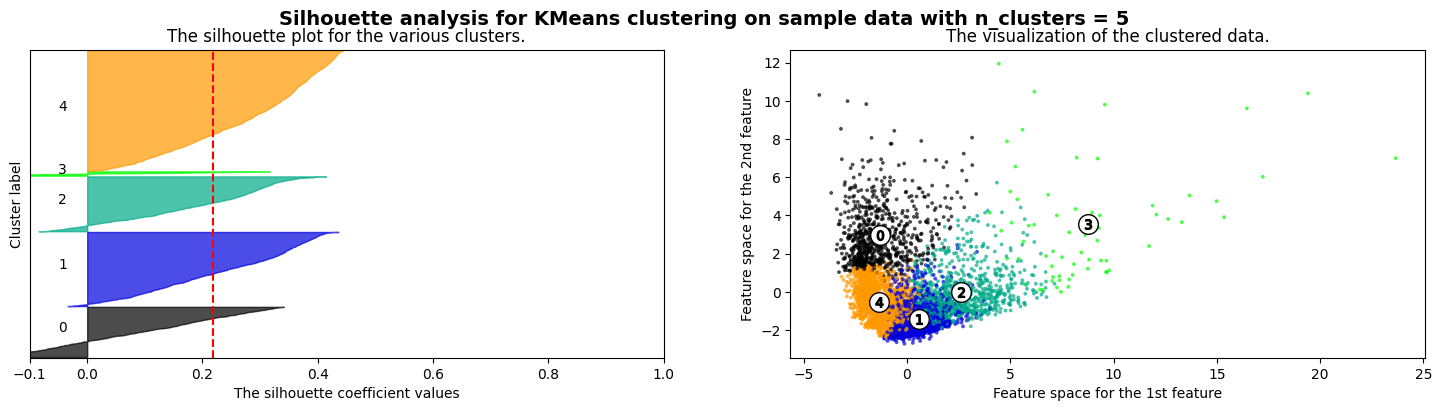

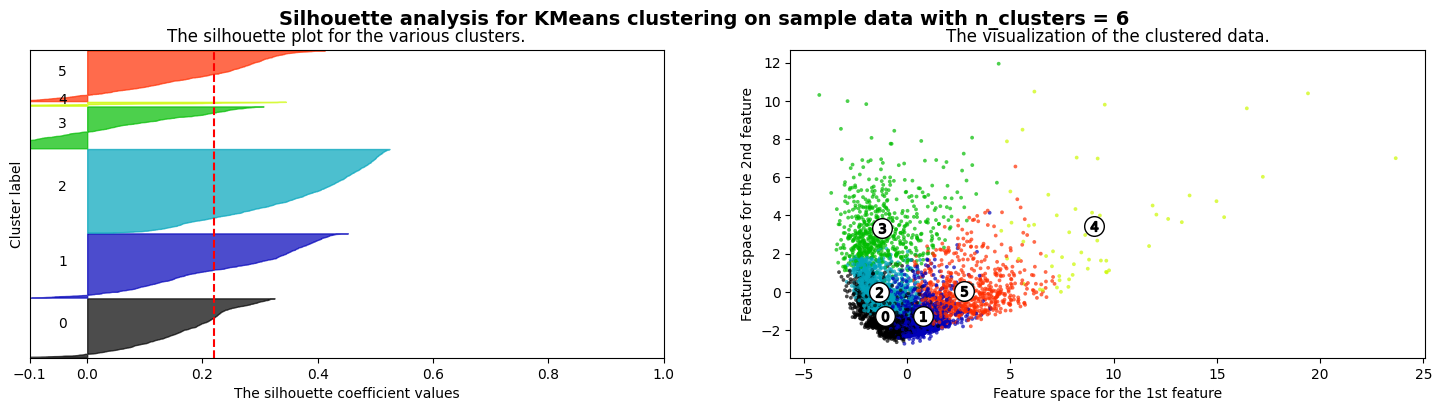

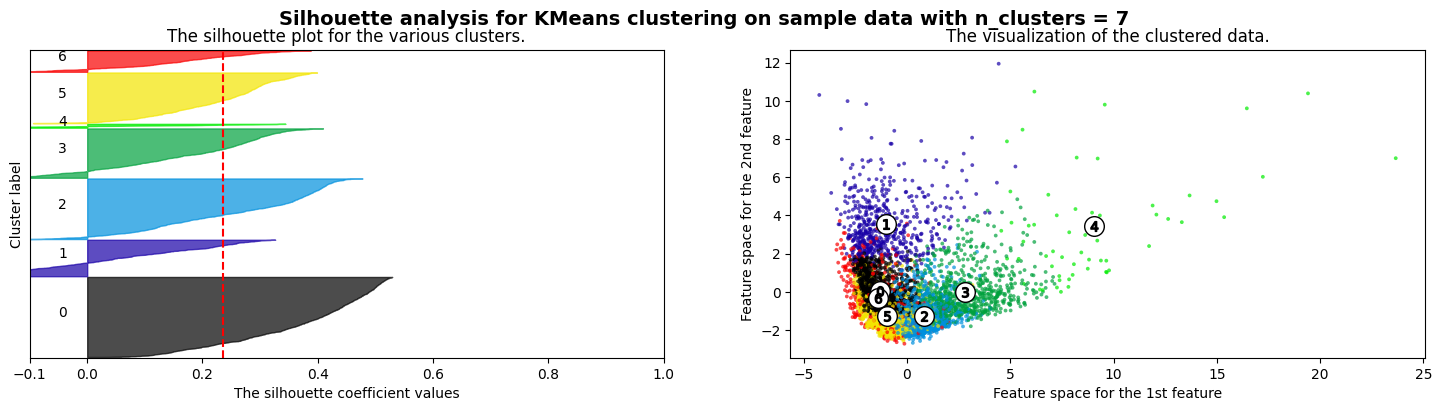

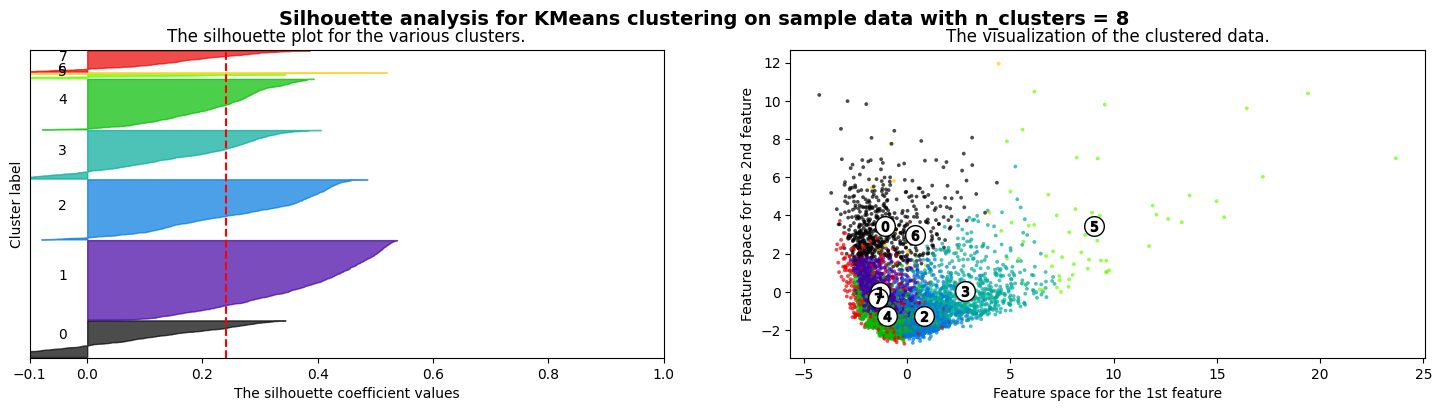

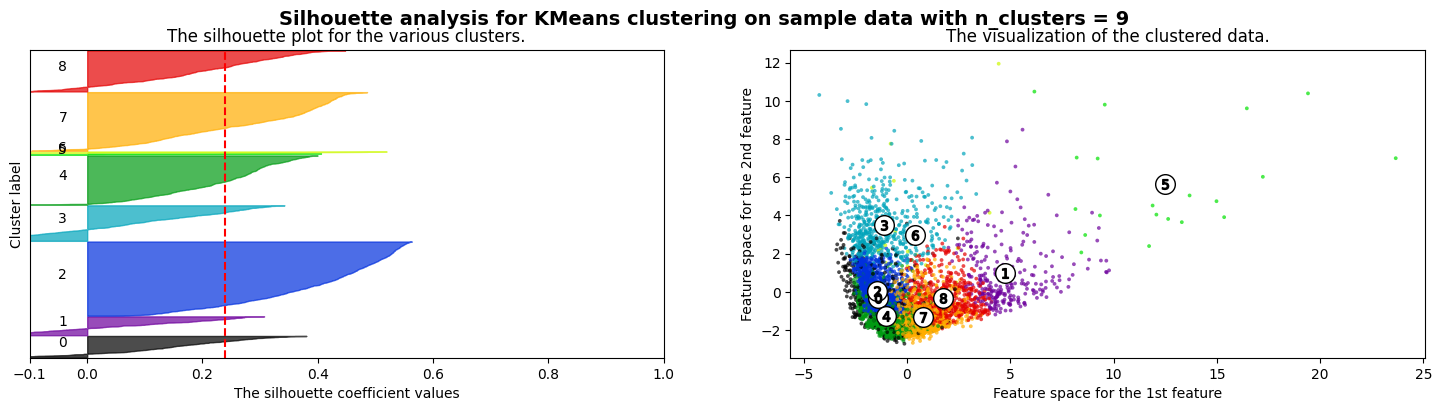

In [257]:
# Menampilkan Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), X_scaled_pca, random_state)

**Insight :**

Berdasarkan hasil analisis observasi menggunakan metode Elbow, Silhouette Score, dan Silhouette Plot, jumlah klaster yang dipilih adalah 5 klaster. Adapun alasan pemilihan 5 klaster yaitu :

- Elbow Method menunjukkan bahwa penurunan nilai inertia mulai melambat setelah 5 klaster, memberikan indikasi bahwa jumlah klaster yang lebih tinggi tidak memberikan perubahan signifikan pada pemisahan data.
- Silhouette Score untuk 5 klaster adalah 0.2178 dibandingkan 4 klaster dengan score 0.2016, yang menunjukkan bahwa pembentukan 5 klaster menghasilkan pemisahan yang lebih baik antar klaster dibandingkan dengan jumlah klaster yang lebih sedikit.
- Silhouette Plot menunjukkan bahwa pembagian 5 klaster lebih seimbang, dengan distribusi yang cukup merata antar klaster, tanpa adanya ketimpangan signifikan seperti yang terlihat pada 4 klaster.

Dengan mempertimbangkan hal tersebut 5 klaster merupakan pilihan yang lebih optimal karena memberikan pemisahan yang lebih baik dan lebih seimbang antar klaster daripada jumlah klaster lainnya

# **7. Model Training and Predict**

In [258]:
# Melatih model KMeans dengan jumlah klaster optimal
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

# Prediksi klaster untuk data hasil scaling dan pca
pred = km.fit_predict(X_scaled_pca)

# Menampilkan hasil prediksi
pred

array([4, 4, 4, ..., 0, 0, 0])

**Insight :**

Hasil di atas merupakan hasil prediksi klaster yang menunjukkan pengelompokan data ke dalam 5 klaster (0, 1, 2, 3, dan 4) berupa array. Setiap klaster mencerminkan karakteristik/kemiripan yang berbeda dari data yang telah dianalisis.


In [259]:
# Melihat di iterasi keberapa model konvergen
km.n_iter_

19

**Insight :**

Berdasarkan hasil analisis di atas, dapat disimpulkan bahwa proses tersebut mencapai keadaan stabil atau konvergen pada iterasi ke-19. Pada iterasi ini, nilai atau perubahan yang terjadi dalam setiap langkah iterasi sudah sangat kecil atau bahkan tidak terjadi perubahan sama sekali, menunjukkan bahwa proses tersebut telah mencapai titik konvergensi.



In [260]:
# Menambahkan kolom 'Cluster' yang berisi hasil prediksi klaster ke dataset asli
df['cluster'] = pred
df

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      installments_purchases  cash_advance  purchases_frequency  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         payments  minimum_payments  prc_full_payment  tenure  cluster  
0        0.000000               NaN          0.000000       8        4  
1      215.325023        410.484825          0.000000       8        4  
2        0.000000               NaN          0.000000       8        4  
3      258.032630        151.696433          0.000000       8        4  
4      397.090516        227.143184          0.000000       8        4  
...           ...               ... 

**Insight :**

Dari hasil di atas, dapat dilihat bahwa kolom 'cluster' berhasil disisipkan / ditambahkan ke dalam dataset asli.

# **8. Exploratory Data Analysis II**

## **8.1. Visualization of Clustering Results**

<Axes: >

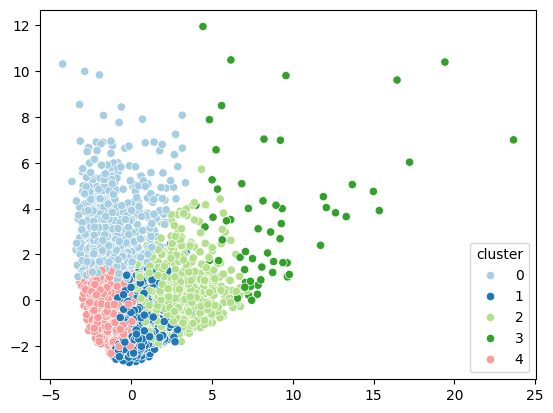

In [261]:
X_scaled_pca_2d = pca_2d.fit_transform(X_scaled_pca)

# Melakukan visualisasi klaster ke dalam 2D
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df['cluster'], palette='Paired')

**Insight :**

Berdasarkan gambar persebaran data di atas, dapat dilihat bahwa data berhasil dibagi menjadi 5 claster, yaitu klaster 0, 1, 2, 3, 4, dan 5.

## **8.2. View the Distribution of Cluster Result Data**

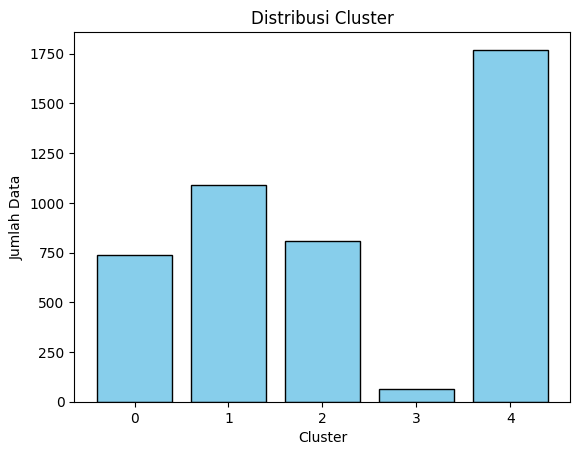

In [262]:
# Membuat visualisasi grafik distribution
plt.bar(cluster_counts.index, cluster_counts['count'], color='skyblue', edgecolor='black')

# Menambahkan label dan judul
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Cluster")

# Menampilkan label cluster pada sumbu x
plt.xticks(cluster_counts.index)  
plt.show()

In [263]:
# Menghitung distribusi setiap cluster
cluster_counts = pd.DataFrame(df["cluster"].value_counts().sort_index())
cluster_counts

count
cluster       
0          740
1         1092
2          808
3           64
4         1770

**Insight :**

Berdasarkan hasil distribusi jumlah data pada setiap klaster di atas, klaster 4 memiliki jumlah data terbanyak yaitu 1770 data, diikuti oleh klaster 1 dengan 1092 data, klaster 2 dengan 808 data, kelaster 0 dengan 740 data dan klaster 3 yang memiliki jumlah data terendah yaitu 64 data

## **8.3. View Characteristics of Each Cluster**

### **8.3.1. Characteristics of Each Cluster = 0**

In [264]:
# Menampilkan data pelanggan di klaster 0
df_filtered0 = df[df['cluster'] == 0]
df_filtered0.head()

cust_id       balance  balance_frequency  purchases  oneoff_purchases  \
1204     1742  12323.845360                1.0     989.32            989.32   
1371     6830   6090.522273                1.0      22.16             22.16   
1518     6694   8953.743398                1.0     254.85             83.97   
1827     3052   9335.314170                1.0     226.23            226.23   
1939     1052  11416.647360                1.0    1347.70              0.00   

      installments_purchases  cash_advance  purchases_frequency  \
1204                    0.00           0.0             0.090909   
1371                    0.00           0.0             0.083333   
1518                  170.88           0.0             0.333333   
1827                    0.00           0.0             0.166667   
1939                 1347.70           0.0             0.583333   

      oneoff_purchases_frequency  purchases_installments_frequency  \
1204                    0.090909                          0.000000   
1371                    0.083333                          0.000000   
1518                    0.083333                          0.250000   
1827                    0.166667                          0.000000   
1939                    0.000000                          0.583333   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
1204                     0.0                 0              2       18000.0   
1371                     0.0                 0              1        9000.0   
1518                     0.0                 0              5       12000.0   
1827                     0.0                 0              5       15000.0   
1939                     0.0                 0              9       15500.0   

         payments  minimum_payments  prc_full_payment  tenure  cluster  
1204  9542.247486       2540.084696               0.0      11        0  
1371   568.781100      30528.432400               0.0      12        0  
1518  2105.588422       3520.422846               0.0      12        0  
1827  1885.239981       4980.192685               0.0      12        0  
1939  2704.076105       2580.556298               0.0      12        0

#### **8.8.1.1. Characteristics of customers credit card usage in Cluster 0 based on balance distribution, payments, credit limits, and cash advance?**

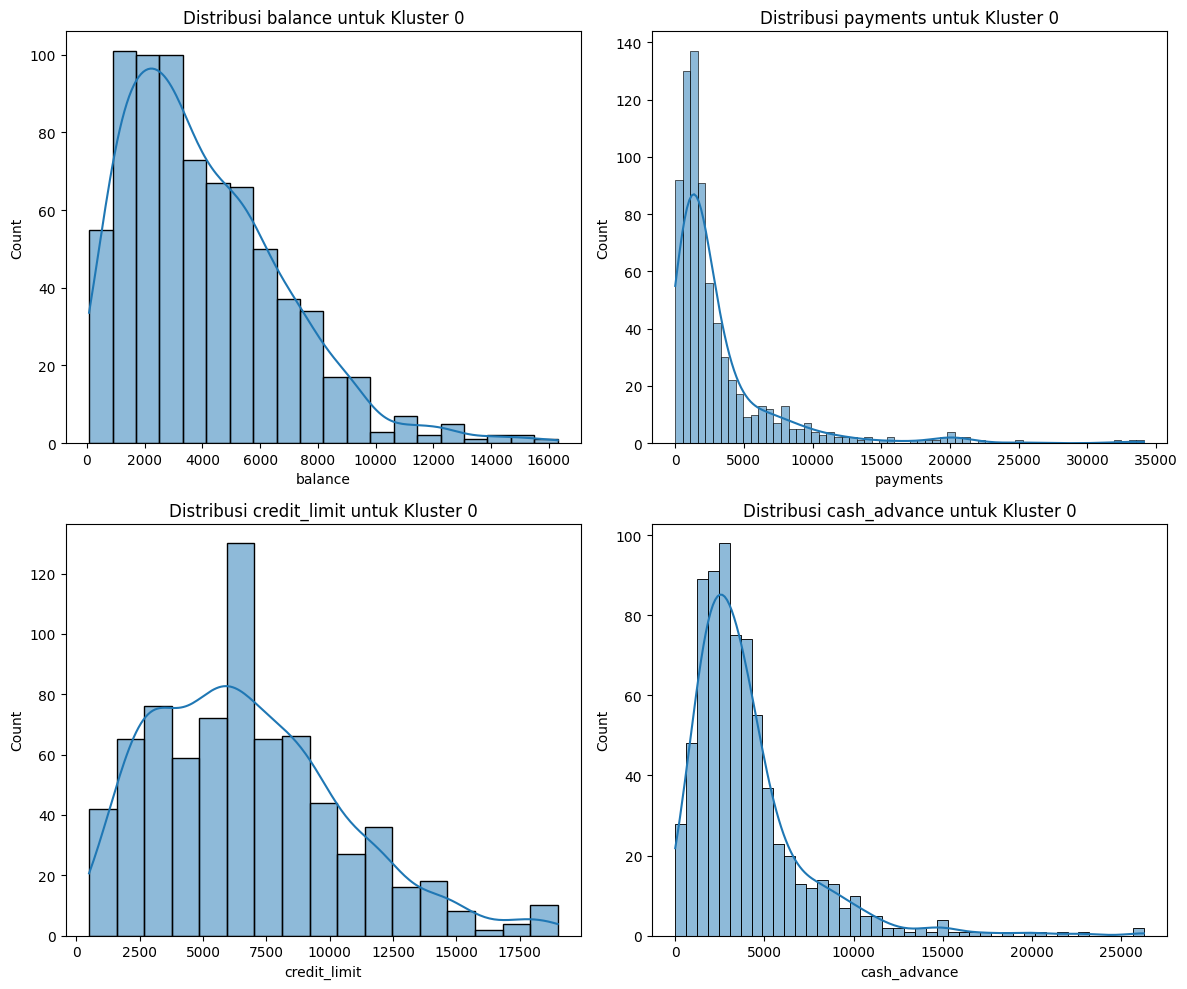

In [265]:
# Membuat plot distribusi untuk fitur-fitur penting di klaster 0
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribusi saldo
sns.histplot(df_filtered0['balance'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi balance untuk Kluster 0')

# Plot distribusi pembayaran
sns.histplot(df_filtered0['payments'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi payments untuk Kluster 0')

# Plot distribusi batas kredit
sns.histplot(df_filtered0['credit_limit'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi credit_limit untuk Kluster 0')

# Plot distribusi cash advance
sns.histplot(df_filtered0['cash_advance'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi cash_advance untuk Kluster 0')

plt.tight_layout()
plt.show()

**Insight Cluster 0**

Berikut merupakan hasil analisis dari distribusi cluster 0 di atas : 

- balance (Saldo): Pelanggan di Klaster 0 memiliki saldo yang relatif tinggi dengan mayoritas berada di kisaran 2000 hingga 4000, sementara beberapa mencapai hingga 16000 menunjukkan penggunaan kartu kredit yang sering/intensif.

- payments (Pembayaran): Pembayaran bervariasi signifikan dengan mayoritas pelanggan membayar di bawah 5000, namun ada pelanggan yang membayar hingga 35000 dalam pembayaran yang dilakukan, dapat diartikan beberapa pelanggan membayar hampir maksimum dan yang lainnya hanya membayar jumlah minimum.

- credit_limit (Batas Kredit): Pelanggan di Klaster 0 cenderung memiliki batas kredit tinggi, dimana credit_limit terkonsentrasi di sekitar 7500, dengan sebagian besar berkisar antara 2500 hingga 10000.

- cash_advance: Beberapa pelanggan di Klaster ini sering menggunakan fasilitas cash advance dengan mayoritas transaksi berkisar di bawah 5000, namun ada beberapa pelanggan yang mencapai 25000

Kesimpulan: Klaster 0 mencerminkan kelompok pelanggan dengan penggunaan kartu kredit yang aktif. Mayoritas memiliki saldo tinggi, batas kredit besar, dan pembayaran bervariasi dari jumlah minimum hingga maksimum. Penggunaan fasilitas cash advance cukup umum,


### **8.3.2. Characteristics of Each Cluster = 1**

In [266]:
# Menampilkan data pelanggan di klaster 1
df_filtered1 = df[df['cluster'] == 1]
df_filtered1.head()

cust_id     balance  balance_frequency  purchases  oneoff_purchases  \
123       48   11.047149           0.545455     180.50               0.0   
127      152  103.622401           0.909091     351.50               0.0   
129      576   21.441736           0.636364     197.62               0.0   
135      818   13.036611           0.818182     197.00               0.0   
141     1122   11.799054           0.500000      77.36               0.0   

     installments_purchases  cash_advance  purchases_frequency  \
123                  180.50           0.0                  0.5   
127                  351.50           0.0                  0.5   
129                  197.62           0.0                  0.5   
135                  197.00           0.0                  0.5   
141                   77.36           0.0                  0.5   

     oneoff_purchases_frequency  purchases_installments_frequency  \
123                         0.0                          0.333333   
127                         0.0                          0.416667   
129                         0.0                          0.500000   
135                         0.0                          0.416667   
141                         0.0                          0.375000   

     cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
123                     0.0                 0              8        4000.0   
127                     0.0                 0              9        3000.0   
129                     0.0                 0              6        4000.0   
135                     0.0                 0              6        1000.0   
141                     0.0                 0              4        1200.0   

       payments  minimum_payments  prc_full_payment  tenure  cluster  
123  269.952974        173.696638          0.750000      12        1  
127  350.616751        169.079690          0.111111      12        1  
129  398.382513        153.645248          1.000000      12        1  
135  224.836018         89.185960          0.444444      12        1  
141  103.635381        117.664686          1.000000       8        1

#### **8.8.2.1. Characteristics of customers credit card usage in Cluster 1 based on balance distribution, payments, credit limits, and cash advance?**

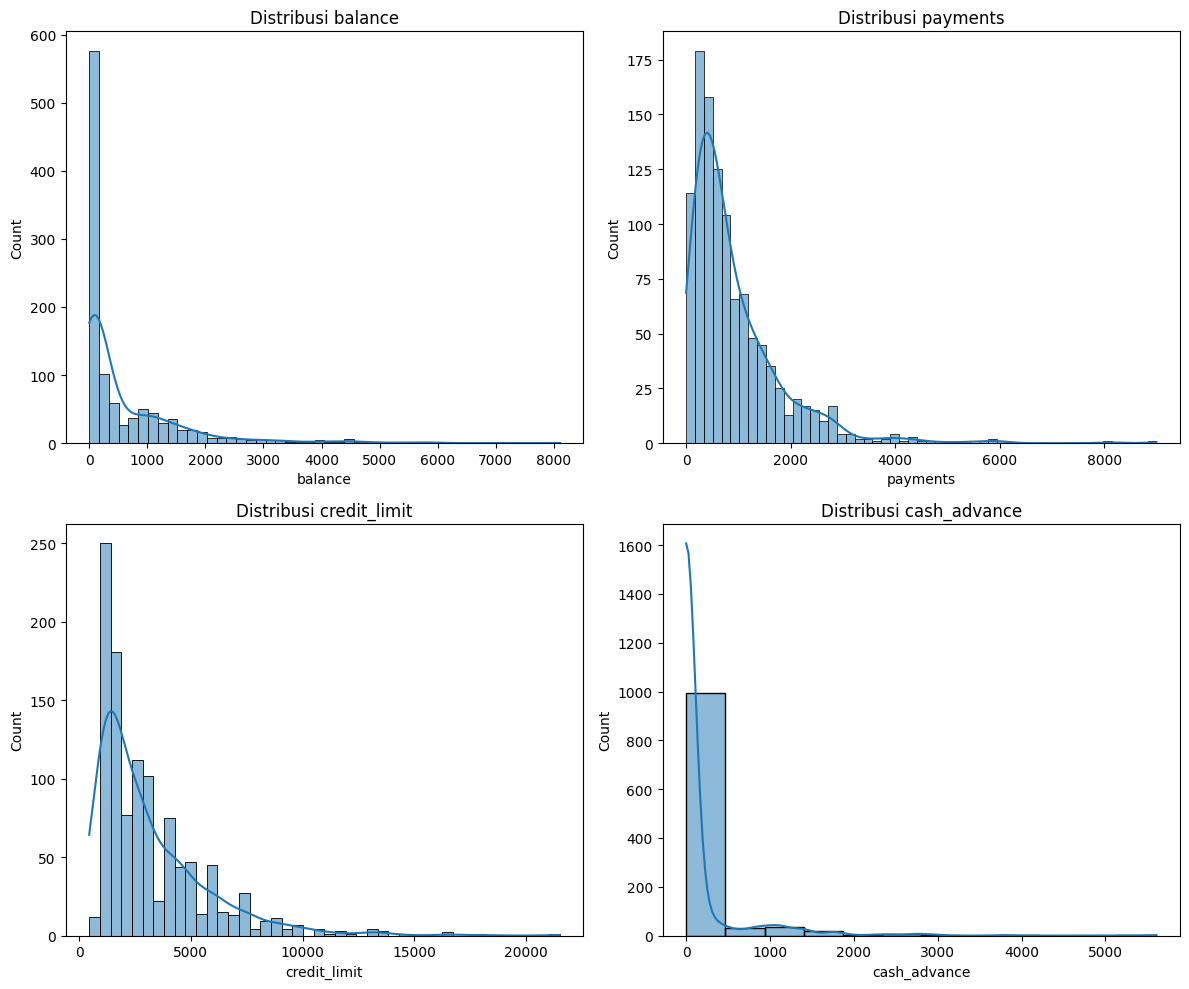

In [267]:
# Membuat plot distribusi untuk fitur-fitur penting di klaster 1
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribusi saldo
sns.histplot(df_filtered1['balance'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi balance')

# Plot distribusi pembayaran
sns.histplot(df_filtered1['payments'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi payments')

# Plot distribusi batas kredit
sns.histplot(df_filtered1['credit_limit'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi credit_limit')

# Plot distribusi cash advance
sns.histplot(df_filtered1['cash_advance'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi cash_advance')

plt.tight_layout()
plt.show()

**Insight Cluster 1:**

Berikut merupakan hasil analisis dari distribusi cluster 1 di atas : 

- balance (Saldo): Pelanggan di Klaster 1 memiliki saldo yang relatif rendah, dengan mayoritas saldo berada di bawah 1000. Sebagian kecil pelanggan memiliki saldo yang mencapai 8000, tetapi ini jarang terjadi. Pola ini menunjukkan penggunaan kartu kredit yang cenderung rendah di Klaster ini.

- payments (Pembayaran): Mayoritas pelanggan di Klaster 1 melakukan pembayaran di bawah 1000, dengan beberapa pelanggan yang mencapai pembayaran hingga 8000. Sebagian besar pelanggan membayar dalam jumlah kecil, sementara hanya sedikit yang membayar dalam jumlah besar.

- credit_limit (Batas Kredit): Pelanggan di Klaster 1 memiliki batas kredit yang mayoritas terkonsentrasi di bawah 5000, dengan puncak distribusi sekitar 1000 hingga 2000. Ada sedikit pelanggan dengan batas kredit yang mencapai hingga 20000, namun ini merupakan outlier.

- cash_advance: Penggunaan fasilitas cash advance sangat rendah di Klaster 1. Sebagian besar pelanggan hampir tidak menggunakan fasilitas ini, dengan mayoritas transaksi di bawah 1000. Hanya sedikit pelanggan yang cash_advancenya mencapai 5000.

**Kesimpulan :**

Klaster 1 mencerminkan pelanggan dengan penggunaan kartu kredit yang rendah. Mayoritas memiliki saldo kecil, batas kredit rendah, dan jarang menggunakan fasilitas cash advance, menunjukkan penggunaan yang konservatif sebagai pelengkap kebutuhan sehari-hari.

### **8.3.3. Characteristics of Each Cluster = 2**

In [268]:
# Menampilkan data pelanggan di klaster 3
df_filtered2 = df[df['cluster'] == 2]
df_filtered2.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
55      3814   939.152528           1.000000    3393.25           3364.59   
110     8046   136.839366           0.636364    1133.54           1133.54   
132      732   131.260514           0.500000    1109.91           1109.91   
134      812   311.341555           0.909091    3721.39           3721.39   
137      912  3310.573808           1.000000     717.14            649.14   

     installments_purchases  cash_advance  purchases_frequency  \
55                    77.66           0.0                 0.25   
110                    0.00           0.0                 0.25   
132                    0.00           0.0                 0.50   
134                    0.00           0.0                 0.50   
137                   68.00           0.0                 0.50   

     oneoff_purchases_frequency  purchases_installments_frequency  \
55                     0.250000                          0.083333   
110                    0.250000                          0.000000   
132                    0.500000                          0.000000   
134                    0.500000                          0.000000   
137                    0.333333                          0.083333   

     cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
55                      0.0                 0              5        9000.0   
110                     0.0                 0              4       16500.0   
132                     0.0                 0             21        9500.0   
134                     0.0                 0             26        4000.0   
137                     0.0                 0              7       12500.0   

        payments  minimum_payments  prc_full_payment  tenure  cluster  
55   2768.821579        267.093439          0.000000      12        2  
110  4802.004681        234.303131          0.428571      12        2  
132  2137.485075         89.478836          1.000000      10        2  
134  4004.905569        156.580586          0.714286      12        2  
137  1372.959063        775.796181          0.000000      12        2

#### **8.8.3.1. Characteristics of customers credit card usage in Cluster 2 based on balance distribution, payments, credit limits, and cash advance?**

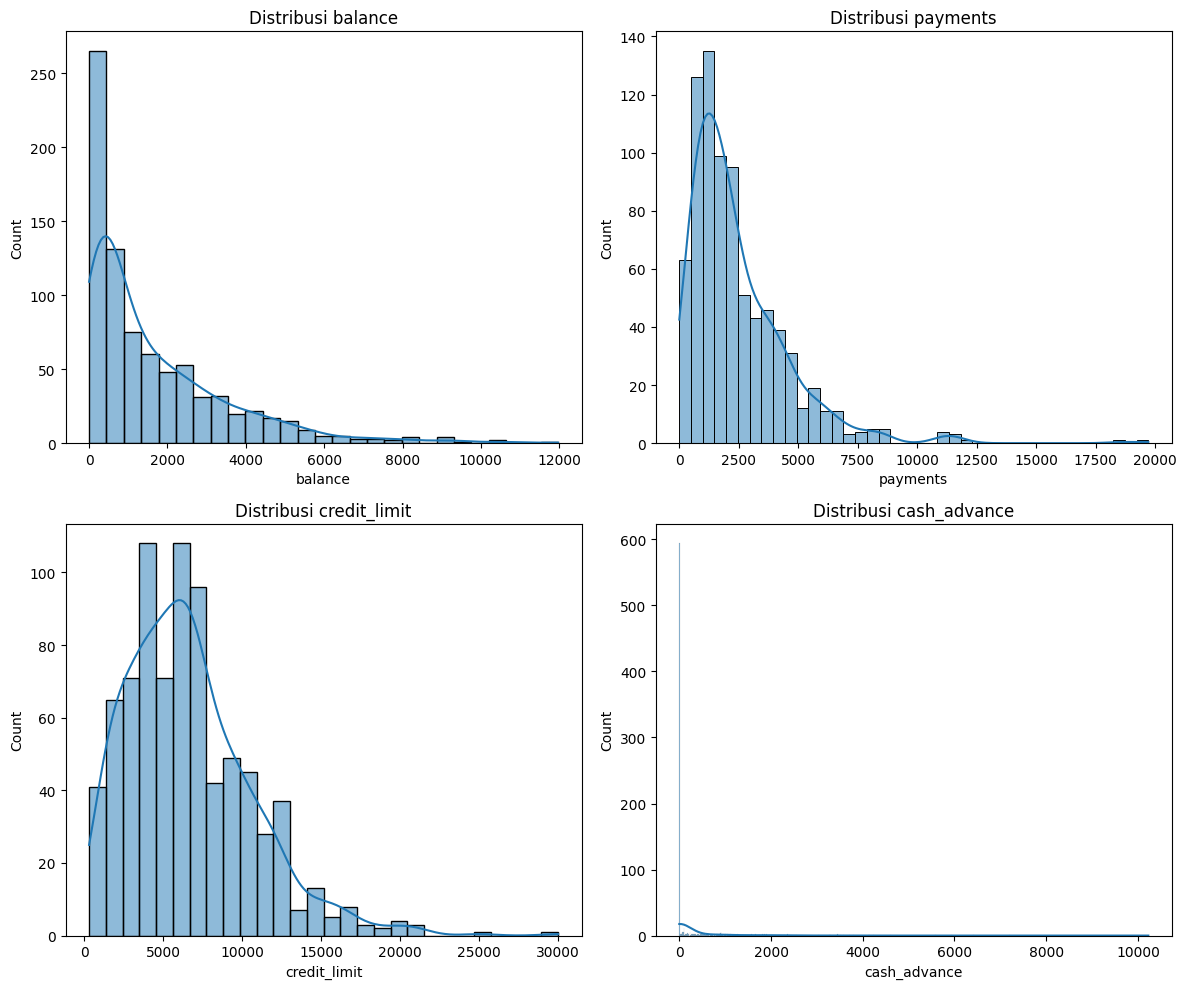

In [269]:
# Membuat plot distribusi untuk fitur-fitur penting di klaster 2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribusi saldo
sns.histplot(df_filtered2['balance'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi balance')

# Plot distribusi pembayaran
sns.histplot(df_filtered2['payments'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi payments')

# Plot distribusi batas kredit
sns.histplot(df_filtered2['credit_limit'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi credit_limit')

# Plot distribusi cash advance
sns.histplot(df_filtered2['cash_advance'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi cash_advance')

plt.tight_layout()
plt.show()

**Insight Cluster 2:**

Berikut merupakan hasil analisis dari distribusi cluster 2 di atas : 

- balance (Saldo): Pelanggan di Klaster 2 memiliki saldo yang relatif rendah hingga sedang. Mayoritas saldo pelanggan berada di bawah 2000, dengan distribusi yang menurun secara bertahap hingga sekitar 12000. Ini menunjukkan sebagian besar pelanggan menggunakan kartu kredit dalam kapasitas moderat.

- payments (Pembayaran): Mayoritas pelanggan di Klaster 2 melakukan pembayaran di bawah 2500, dengan sebagian kecil pelanggan membayar hingga 10000 atau lebih. Ini mencerminkan pola pembayaran yang bervariasi, meskipun sebagian besar pelanggan membayar dalam jumlah kecil hingga menengah.

- credit_limit (Batas Kredit): Batas kredit untuk pelanggan di Klaster 2 terkonsentrasi di kisaran 5000 hingga 15000, dengan puncak distribusi di sekitar 10000. Beberapa pelanggan memiliki batas kredit yang sangat tinggi, mencapai 30000, tetapi ini relatif jarang.

- cash_advance: Penggunaan fasilitas cash advance di Klaster 2 sangat rendah. Mayoritas transaksi cash advance berada di bawah 1000, dan hampir tidak ada pelanggan yang memanfaatkan fasilitas ini hingga jumlah yang signifikan.

**Kesimpulan :**

Klaster 2 mencerminkan pelanggan dengan penggunaan kartu kredit yang sedang. Mayoritas memiliki saldo rendah hingga sedang, batas kredit sedang hingga tinggi, dan pembayaran dalam jumlah kecil hingga menengah. Penggunaan fasilitas cash advance sangat rendah, menunjukkan bahwa pelanggan di klaster ini cenderung tidak bergantung pada fitur ini

### **8.3.4. Characteristics of Each Cluster = 3**

In [270]:
# Menampilkan data pelanggan di klaster 3
df_filtered3 = df[df['cluster'] == 3]
df_filtered3.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
189     4664  4060.710208           0.727273   22500.00              0.00   
338     5644  2723.369217           0.909091   10410.49           1158.84   
355     7186  1355.180523           0.909091    8820.67           2549.65   
427      400   348.342172           0.909091   11878.25           7958.96   
442      526  2643.343414           1.000000   26402.39          22257.39   

     installments_purchases  cash_advance  purchases_frequency  \
189                22500.00           0.0                 0.50   
338                 9251.65           0.0                 0.75   
355                 6271.02           0.0                 0.75   
427                 3919.29           0.0                 1.00   
442                 4145.00           0.0                 1.00   

     oneoff_purchases_frequency  purchases_installments_frequency  \
189                    0.000000                          0.416667   
338                    0.666667                          0.583333   
355                    0.583333                          0.583333   
427                    1.000000                          0.416667   
442                    1.000000                          0.333333   

     cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
189                     0.0                 0             12       23000.0   
338                     0.0                 0             41       19500.0   
355                     0.0                 0             37        6500.0   
427                     0.0                 0            103        6000.0   
442                     0.0                 0            114       16500.0   

         payments  minimum_payments  prc_full_payment  tenure  cluster  
189   8760.860264       1645.535202          0.000000      12        3  
338   9695.650901        726.696049          0.363636      12        3  
355   3609.323897        416.412205          0.000000      12        3  
427  11845.841240        156.683560          0.600000      12        3  
442  24529.276620        534.032339          1.000000      12        3

#### **8.8.4.1. Characteristics of customers credit card usage in Cluster 3 based on balance distribution, payments, credit limits, and cash advance?**

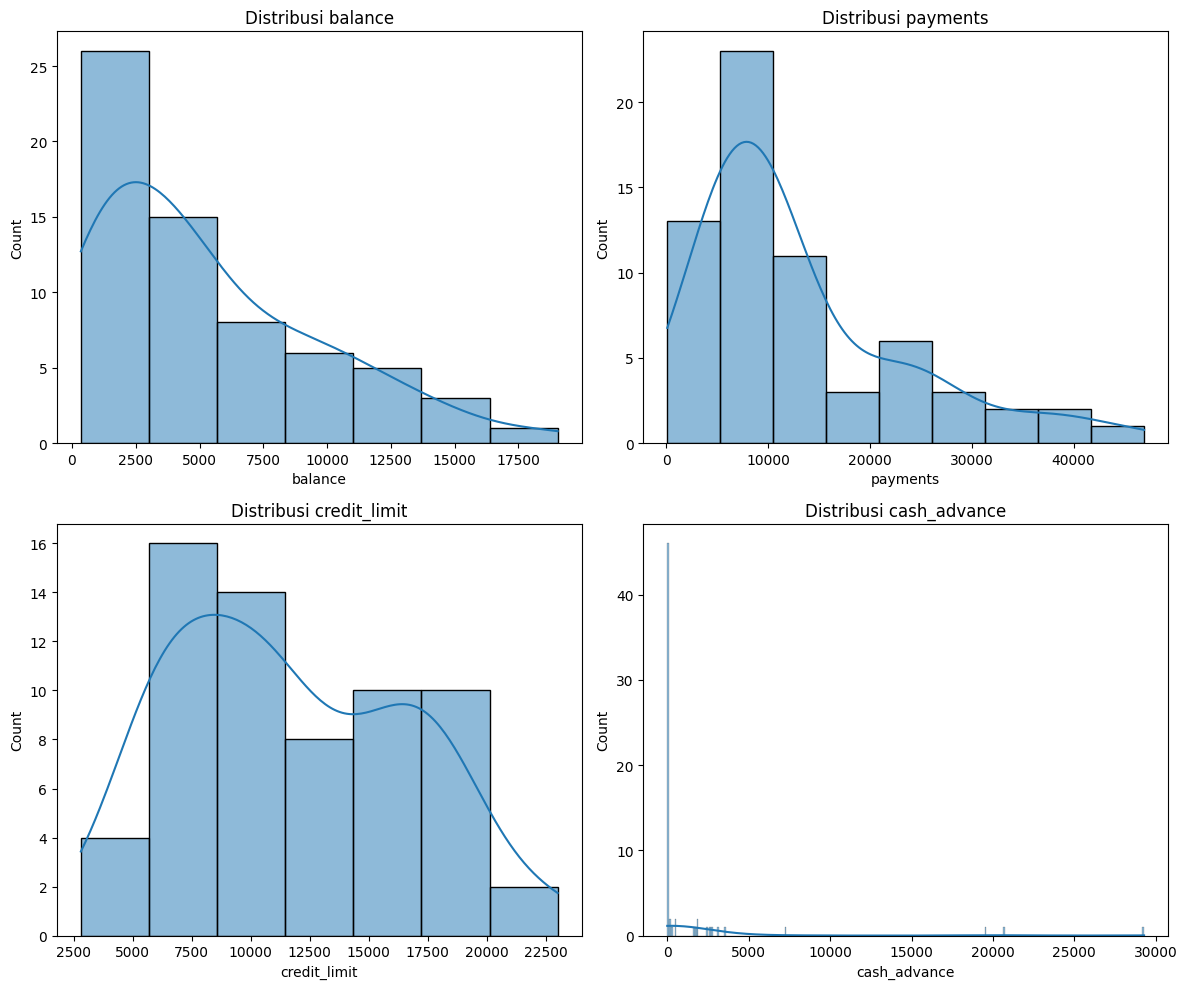

In [271]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribusi saldo
sns.histplot(df_filtered3['balance'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi balance')

# Plot distribusi pembayaran
sns.histplot(df_filtered3['payments'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi payments')

# Plot distribusi batas kredit
sns.histplot(df_filtered3['credit_limit'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi credit_limit')

# Plot distribusi cash advance
sns.histplot(df_filtered3['cash_advance'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi cash_advance')

plt.tight_layout()
plt.show()

**Insight :**

Berikut merupakan hasil analisis dari distribusi cluster 3 di atas : 

- balance (Saldo): Pelanggan di klaster 3 memiliki saldo yang cukup tinggi dibandingkan kluster lainnya. Mayoritas saldo pelanggan berada di kisaran 2500 hingga 5000, dengan beberapa pelanggan mencapai saldo hingga 17500. Hal ini menunjukkan bahwa pelanggan di kluster ini aktif menggunakan kartu kredit mereka.

- payments (Pembayaran): Pembayaran oleh pelanggan di klaster 3 cukup bervariasi. Mayoritas pelanggan melakukan pembayaran sekitar 10000 hingga 15000. Beberapa pelanggan melakukan pembayaran yang sangat besar, hingga 40000. Hal ini menunjukkan bahwa pelanggan di kluster ini sering membayar dalam jumlah besar.

- credit_limit (Batas Kredit): Batas kredit untuk pelanggan di klaster 3 cukup tinggi, dengan mayoritas pelanggan memiliki batas kredit di kisaran 5000 hingga 15000. Sebagian kecil pelanggan memiliki batas kredit hingga 22500, menunjukkan bahwa pelanggan di kluster ini memiliki potensi finansial yang baik.

- cash_advance: Penggunaan fasilitas cash advance di klaster 3 sangat rendah, dengan mayoritas pelanggan hampir tidak memanfaatkan fasilitas ini. Sebagian kecil pelanggan menggunakan cash advance hingga sekitar 5000, tetapi penggunaan di atas jumlah ini sangat jarang

**Kesimpulan :**

Klaster 3 mencerminkan pelanggan dengan saldo kartu kredit yang tinggi. Pembayaran bervariasi dengan jumlah besar, dan batas kredit tergolong tinggi, menunjukkan potensi finansial yang baik. Penggunaan fasilitas cash advance sangat rendah, menandakan pelanggan tidak bergantung pada fitur ini

### **8.3.5. Characteristics of Each Cluster = 4**

In [272]:
# Menampilkan data pelanggan di klaster 4
df_filtered4 = df[df['cluster'] == 4]
df_filtered4.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   installments_purchases  cash_advance  purchases_frequency  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     payments  minimum_payments  prc_full_payment  tenure  cluster  
0    0.000000               NaN               0.0       8        4  
1  215.325023        410.484825               0.0       8        4  
2    0.000000               NaN               0.0       8        4  
3  258.032630        151.696433               0.0       8        4  
4  397.090516        227.143184               0.0       8        4

#### **8.8.5.1. Characteristics of customers credit card usage in Cluster 4 based on balance distribution, payments, credit limits, and cash advance?**

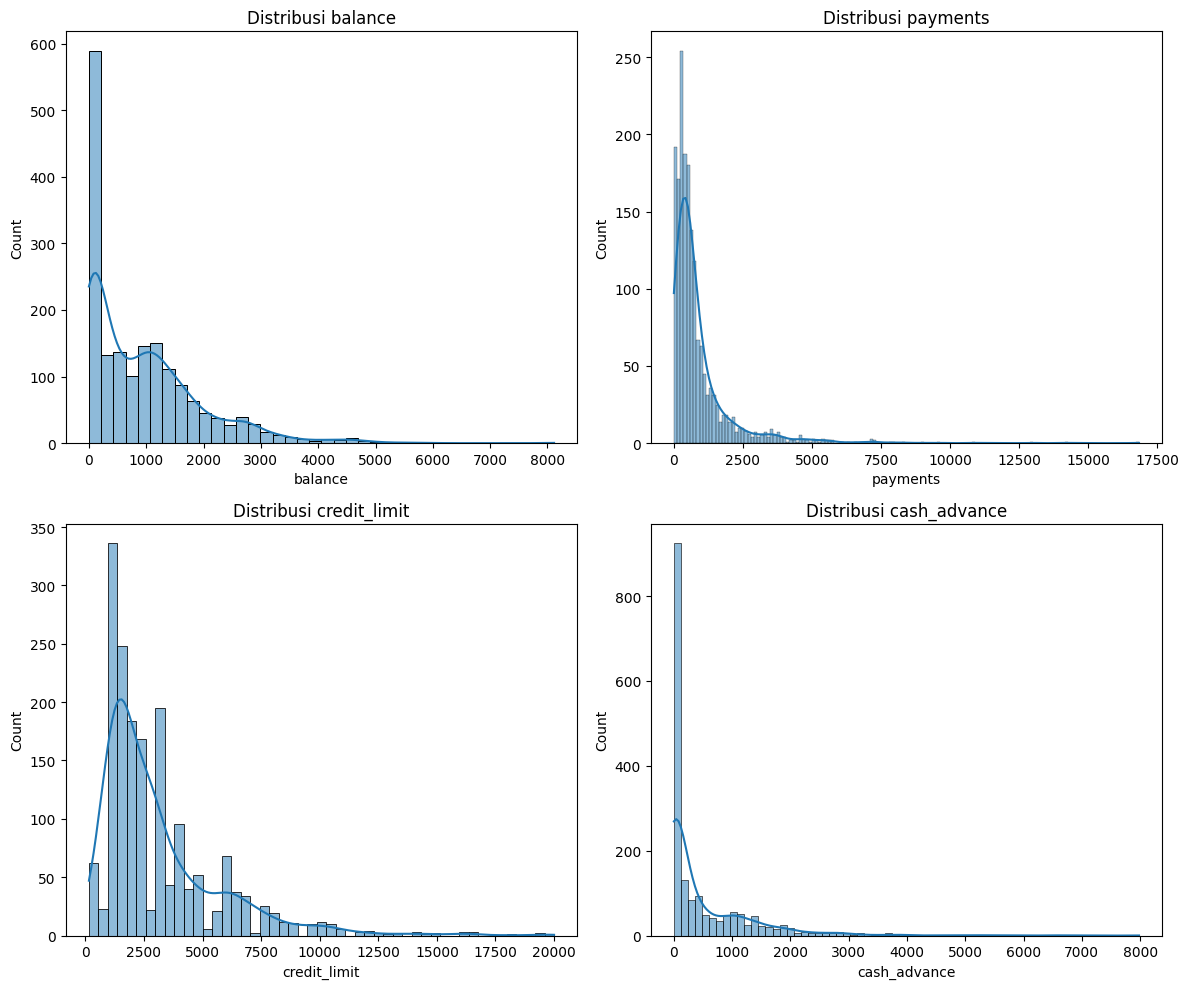

In [273]:
# Membuat plot distribusi untuk fitur-fitur penting di klaster 4
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribusi saldo
sns.histplot(df_filtered4['balance'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi balance')

# Plot distribusi pembayaran
sns.histplot(df_filtered4['payments'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi payments')

# Plot distribusi batas kredit
sns.histplot(df_filtered4['credit_limit'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi credit_limit')

# Plot distribusi cash advance
sns.histplot(df_filtered4['cash_advance'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi cash_advance')

plt.tight_layout()
plt.show()

**Insight :**

Berikut merupakan hasil analisis dari distribusi cluster 4 di atas : 

- balance (Saldo) : Pelanggan di klaster 4 umumnya memiliki saldo rendah, dengan mayoritas berada di bawah 2.500. Beberapa pelanggan memiliki saldo yang mencapai sekitar 7.500 hingga 8.000. Distribusi ini menunjukkan bahwa sebagian besar pelanggan cenderung tidak menyimpan saldo yang besar pada kartu kredit mereka.

- payments (Pembayaran) : Pembayaran pelanggan di klaster 4 mayoritas berada di bawah 2.500, dengan puncak distribusi di kisaran 1.000 hingga 2.500. Sangat sedikit pelanggan yang melakukan pembayaran besar, seperti hingga 10.000 atau lebih. Hal ini menunjukkan bahwa pelanggan di klaster ini cenderung membayar dalam jumlah yang kecil.

- credit_limit (Batas Kredit)Batas kredit pelanggan di klaster 4 sebagian besar berada di bawah 5.000, dengan beberapa pelanggan memiliki batas hingga 7.500 atau lebih. Ini menunjukkan bahwa pelanggan di klaster ini umumnya memiliki kemampuan finansial yang moderat dibandingkan klaster lainnya.

- cash_advance : Penggunaan fasilitas cash advance oleh pelanggan di klaster 4 sangat jarang. Mayoritas pelanggan tidak menggunakan fasilitas ini, dengan puncak distribusi berada di bawah 1.000. Hanya sedikit pelanggan yang menggunakan cash advance hingga sekitar 3.000 atau lebih.

**Kesimpulan :**

Klaster 4 mencerminkan pelanggan dengan saldo kartu kredit yang rendah. Pembayaran umumnya kecil, dan batas kredit tergolong rendah, menunjukkan kemampuan finansial yang moderat. Penggunaan fasilitas cash advance sangat jarang, menandakan pelanggan tidak bergantung pada fitur ini.

# **9. Model Saving**

In [274]:
# Simpan daftar kolom numerik (num_cols)
with open('list_num_cols.json', 'w') as num_file:
    json.dump(num_cols, num_file)

# Simpan scaler ke dalam file menggunakan pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Simpan model PCA ke dalam file menggunakan pickle
with open('pca_model.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)

# Simpan model KMeans ke dalam file menggunakan pickle
with open('kmeans_model.pkl', 'wb') as kmeans_file:
    pickle.dump(km, kmeans_file)

# **10. Model Inference**

In [275]:
# Muat daftar kolom numerik
with open('list_num_cols.json', 'r') as file:
    num_cols = json.load(file)

# Muat scaler
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Muat PCA model
with open('pca_model.pkl', 'rb') as pca_file:
    pca = pickle.load(pca_file)

# Muat KMeans model
with open('kmeans_model.pkl', 'rb') as kmeans_file:
    kmeans = pickle.load(kmeans_file)

In [276]:
# Membuat data baru untuk dilakukan prediksi
data = {
    'cust_id': [4476],
    'balance': [193.52],
    'balance_frequency': [0.116468],
    'purchases': [202.96],
    'oneoff_purchases': [60.75],
    'installments_purchases': [12.20],
    'cash_advance': [48.48],
    'purchases_frequency': [0.372074],
    'oneoff_purchases_frequency': [0.563347],
    'purchases_installments_frequency': [0.531552],
    'cash_advance_frequency': [0.091858],
    'cash_advance_trx': [0],
    'purchases_trx': [3],
    'credit_limit': [1482.98],
    'payments': [208.66],
    'minimum_payments': [116.04],
    'prc_full_payment': [0.976615],
    'tenure': [7]
}


In [277]:
# Membuat dataframe dari dataset baru
df_inf = pd.DataFrame(data)
df_inf

cust_id  balance  balance_frequency  purchases  oneoff_purchases  \
0     4476   193.52           0.116468     202.96             60.75   

   installments_purchases  cash_advance  purchases_frequency  \
0                    12.2         48.48             0.372074   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.563347                          0.531552   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.091858                 0              3       1482.98   

   payments  minimum_payments  prc_full_payment  tenure  
0    208.66            116.04          0.976615       7

In [278]:
# Menggunakan model yang telah di simpan sebelumnya

# Hanya gunakan kolom numerik dari data baru
df_inf_num = df_inf[num_cols]

# Transformasi data menggunakan scaler
data_scaling = scaler.transform(df_inf_num)

# Transformasi data menggunakan PCA
data_pca = pca.transform(data_scaling)

# Prediksi cluster menggunakan model KMeans
prediction = kmeans.predict(data_pca)

print(f"The predicted cluster for customer with id 4476 is: Cluster {prediction[0]}")

The predicted cluster for customer with id 4476 is: Cluster 1


In [279]:
# Menambahkan kolom 'cluster' pada dataset asli berdasarkan prediksi
df_inf['cluster'] = prediction

In [280]:
# Menampilkan hasil
df_inf

cust_id  balance  balance_frequency  purchases  oneoff_purchases  \
0     4476   193.52           0.116468     202.96             60.75   

   installments_purchases  cash_advance  purchases_frequency  \
0                    12.2         48.48             0.372074   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.563347                          0.531552   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.091858                 0              3       1482.98   

   payments  minimum_payments  prc_full_payment  tenure  cluster  
0    208.66            116.04          0.976615       7        1

**Insight :**

Berdasarkan hasil inferensi model menggunakan data baru, pelanggan dengan ID 4476 diprediksi masuk ke kluster 1. Hal ini menunjukkan bahwa model memperkirakan pelanggan tersebut berpotensi untuk melakukan transaksi di masa mendatang

# **11. Conclusion**

Setelah melakukan analisis terhadap data penggunaan kartu kredit selama enam bulan terakhir di Bank ABC, dan melewati berbagai tahap analisis data seperti cleaning data, feature engineering (scaliing, pca, dll) dan eksplorasi data, penggunaan data kartu kredit selama enam bulan terakhir di Bank ABC berhasil membagi / mensegmentasi pelanggan menjadi 5 Klaster yang berbeda menggunakan algoritma K-Means Clustering. Setiap klaster mencerminkan pola perilaku penggunaan kartu kredit yang unik di setiap klasternya yang diharapkan dapat membantu Bank ABC untuk merancang strategi pemasaran dan pengembangan produk yang lebih efektif dan efisien.

Berikut merupakan pembagian 5 klaster beserta sifatnya yaitu :

1. Klaster 0: Pelanggan aktif dengan saldo tinggi, batas kredit besar, dan memiliki variasi pembayaran. Customer di Klaster ini memanfaatkan fasilitas cash advance dengan cukup sering

2.  Klaster 1: Pelanggan dengan penggunaan / transaksi rendah, saldo kecil, dan batas kredit rendah. Customer di klster ini cenderung menggunakan kartu kredit secara hemat / konservatif untuk kebutuhan sehari-harinya.

3.  Klaster 2: Pelanggan dengan penggunaan / transaksi sedang, saldo dan batas kredit bervariasi, serta pembayaran kecil hingga menengah. Penggunaan cash advance di Klaster ini sangat rendah

4.  Klaster 3: Pelanggan dengan saldo yang cukup tinggi dan pembayaran juga cukup besar. Kemudian batas kredit customer di Klaster ini tergolong tinggi, tetapi penggunaan cash advance sangat minim.

5.  Klaster 4: Pelanggan dengan saldo yang rendah dan pembayaran kecil, kemudian batas kredit juga cukup rendah. Penggunaan cash advance jarang terjadi di Klaster ini

### **Rekomendasi Bisnis**

Dari hasil segmentasi customer tersebut, Bank ABC dapat merencanakan dan mengembangkan strategi pemasaran yang lebih sesuai dan terarah untuk setiap Klaster:
- Klaster 0: Fokus pada promosi produk yang lebih bagus / premium untuk meningkatkan loyalitas customer
- Klaster 1: Melakukan edukasi tentang manfaat optimalisasi penggunaan kartu kredit kemudian tawarkan peningkatan batas kredit
- Klaster 2: Tawarkan produk yang menarik kepada pelanggan, seperti program cashback atau rewards untuk meningkatkan penggunaan kartu kredit customer di Klaster ini
- Klaster 3: Mengembangkan / memberikan penawaran khusus yang memberikan manfaat serta nilai tambah bagi customer dengan potensi finansial yang tinggi
- Klaster 4: Memberikan informasi dan promosi untuk mendorong penggunaan kartu kredit lebih aktif


### **Saran Analisis Selanjutnya**

Untuk analisis selanjutnya lakukanlah EDA tambahan untuk mengetahui wawasan yang lebih luas dan berharga bagi Bank ABC. Dengan menganalisis faktor-faktor seperti waktu transaksi, jenis belanja, frequensi penggunaan, dsb.
Contohnya
- Menemukan kelompok pelanggan yang mungkin tidak mendapatkan perhatian atau layanan yang cukup.
- Mengidentifikasi waktu di mana penggunaan kartu kredit paling tinggi, sehingga promosi pemasaran dapat ditargetkan dengan lebih baik lagi
- Memahami  dan mengetahui preferensi pelanggan untuk menawarkan produk yang lebih sesuai dengan kebutuhan mereka.

Dengan saran ini untuk analisi berikutnya diharapkan dapat memberikan insight yang lebih mendalam pendekatan ini, Bank ABC Dengan saran ini untuk analisis berikutnya, diharapkan dapat memberikan wawasan yang lebih mendalam kepada Bank ABC untuk lebih memahami customer dan menciptakan pengalaman yang lebih menarik sehingga meningkatkan kepuasan dan loyalitas customer terhadap penggunaan kartu kredit.